In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [4]:
print('No of Rows:', df.shape[0])
print('No of Columns:', df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No of Rows: 7752
No of Columns: 25


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

# Statistical Analysis

In [6]:
df.duplicated().sum()

0

In [7]:
df.isin([' ', 'NA','-']).sum().any()

False

## Missing value check

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                  Missing Values  %Missing data
LDAPS_CC3                     75       0.967492
LDAPS_PPT4                    75       0.967492
LDAPS_PPT2                    75       0.967492
LDAPS_PPT1                    75       0.967492
LDAPS_CC4                     75       0.967492
LDAPS_CC2                     75       0.967492
LDAPS_CC1                     75       0.967492
LDAPS_LH                      75       0.967492
LDAPS_WS                      75       0.967492
LDAPS_Tmin_lapse              75       0.967492
LDAPS_Tmax_lapse              75       0.967492
LDAPS_RHmax                   75       0.967492
LDAPS_RHmin                   75       0.967492
LDAPS_PPT3                    75       0.967492
Present_Tmin                  70       0.902993
Present_Tmax                  70       0.902993
Next_Tmax                     27       0.348297
Next_Tmin                     27       0.348297
Date                           2       0.025800
station                        2       0

In [9]:
print('We had {} Rows and {} Columns before dropping null values.'.format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print('We have {} Rows and {} Columns after droping null values.'.format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after droping null values.


In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']= df['Date'].apply(lambda x:x.day)
df['Month']= df['Date'].apply(lambda x:x.month)
df['Year']= df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

In [11]:
import reverse_geocoder as rg
import pprint

In [23]:
geodata =[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
    
geo_names = pd.DataFrame(geodata).transpose()

In [24]:
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
                                               
df['City']= geo_names[0].apply(lambda x:x.get('name'))                         

In [25]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000   
mean     61.918136     1.259755      5343.724208    30.241526    22.910820   
std      54.323529     1.372748       429.782561     3.111807     2.482256   
min      12.370000     0.098500      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      5001.485717    28.200000    21.300000   
50%      45.716000     0.618000      5441.987305    30.400000    23.100000   
75%      59.832400     1.767800      5729.485840    32.600000    24.600000   
max     212.335000     5.178200      5992.895996    38.900000    29.800000   

               Day        Month         Year  
count  7588.000000  7588.000000  7588.000000  
mean     16.337375     7.068134  2014.991697  
std       8.216880     2.242389     1.410877  
min       7.000000     1.000000  2013.000000  
25%       8.000000     7.000000  2014.000000  
50%      16.000000     7.000000  2015.000000  
75%      24.000000     8.000000  2016.000000  
max      31.000000    12.000000  2017.000000

## Start Exploring Present Temperature

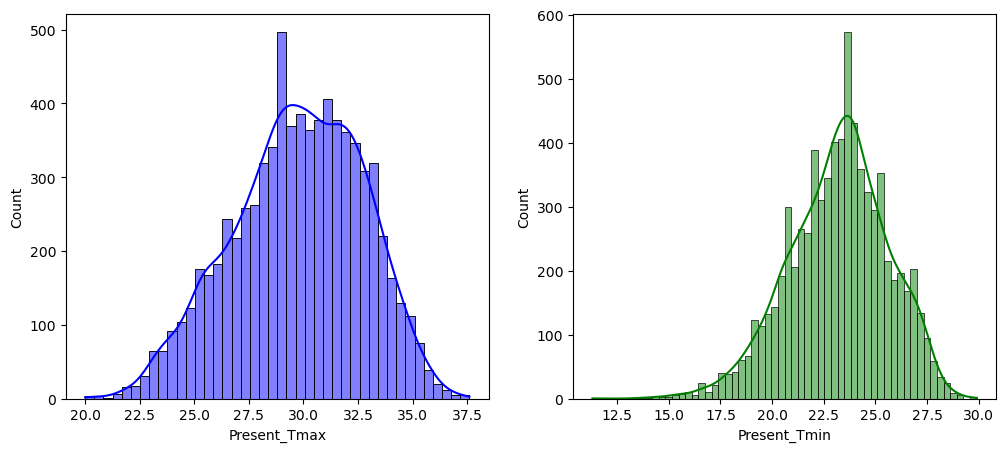

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True, color= 'b')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True, color= 'g')
plt.show()

In [27]:
pd.set_option('display.max_columns',None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8    8     11  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [28]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [29]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    8      2  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [30]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

### let visualise & gain insight over this by plotting line plot over all station


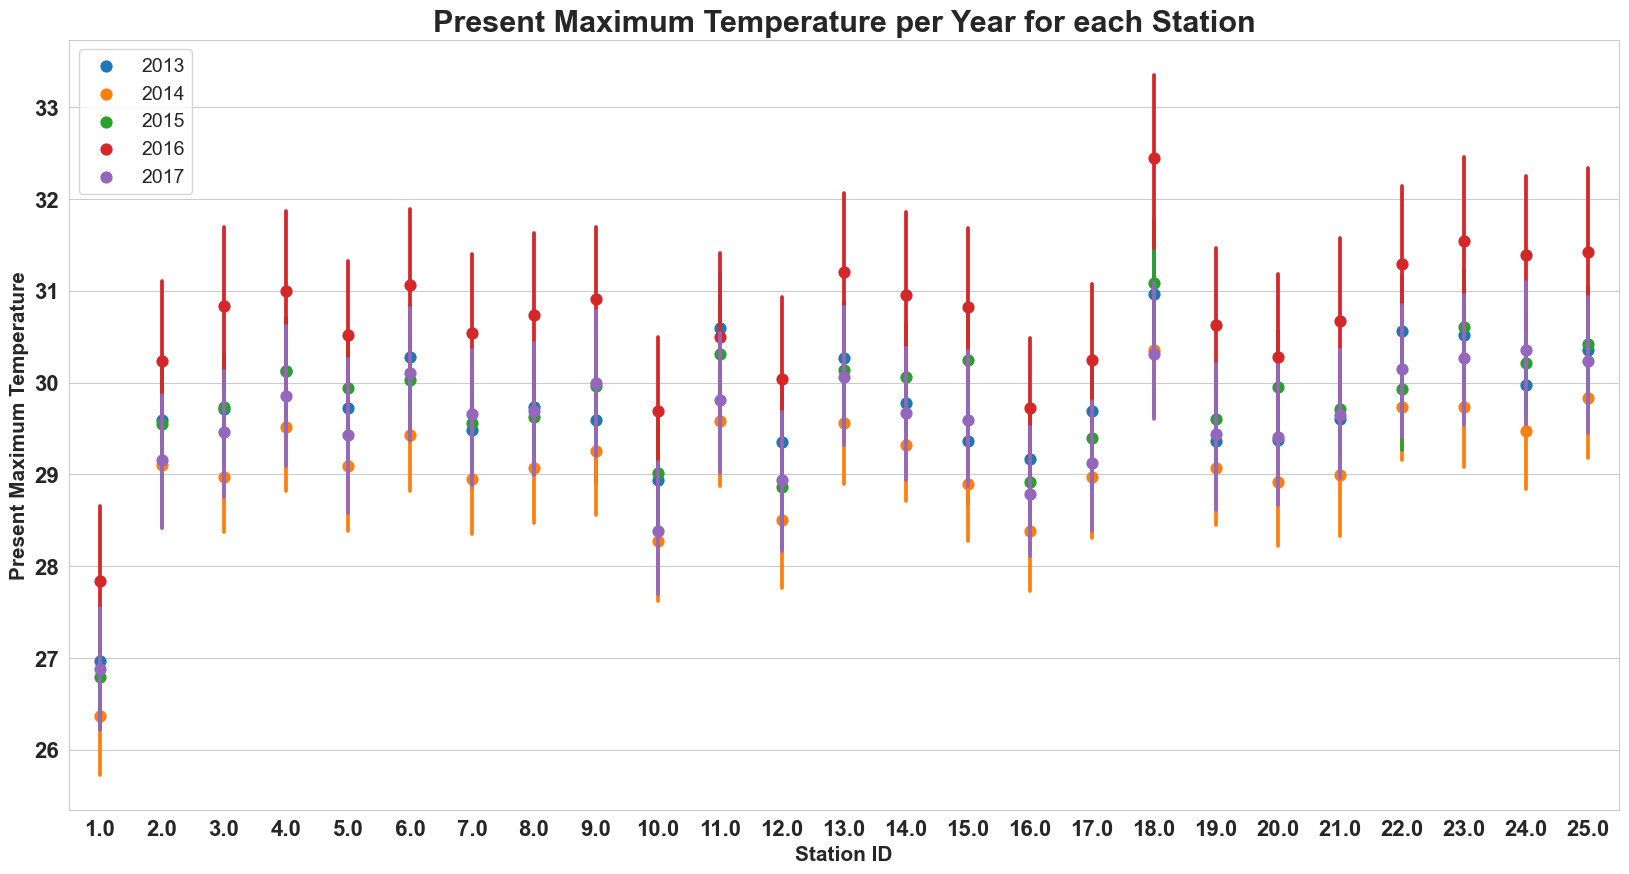

In [31]:
plt.figure(figsize= (20, 10))
sns.set_style('whitegrid')
sns.pointplot(x= 'station', y= 'Present_Tmax', data=df, hue='Year', join=False)
plt.title('Present Maximum Temperature per Year for each Station', fontsize= 22, fontweight='bold')
plt.xlabel('Station ID', {'fontsize' : 15,'fontweight' : 'bold'})
plt.ylabel('Present Maximum Temperature', {'fontsize' : 15,'fontweight' : 'bold'})
plt.xticks(fontsize = 16, fontweight = 'bold')
plt.yticks(fontsize = 16, fontweight = 'bold')
plt.legend(fontsize=14)

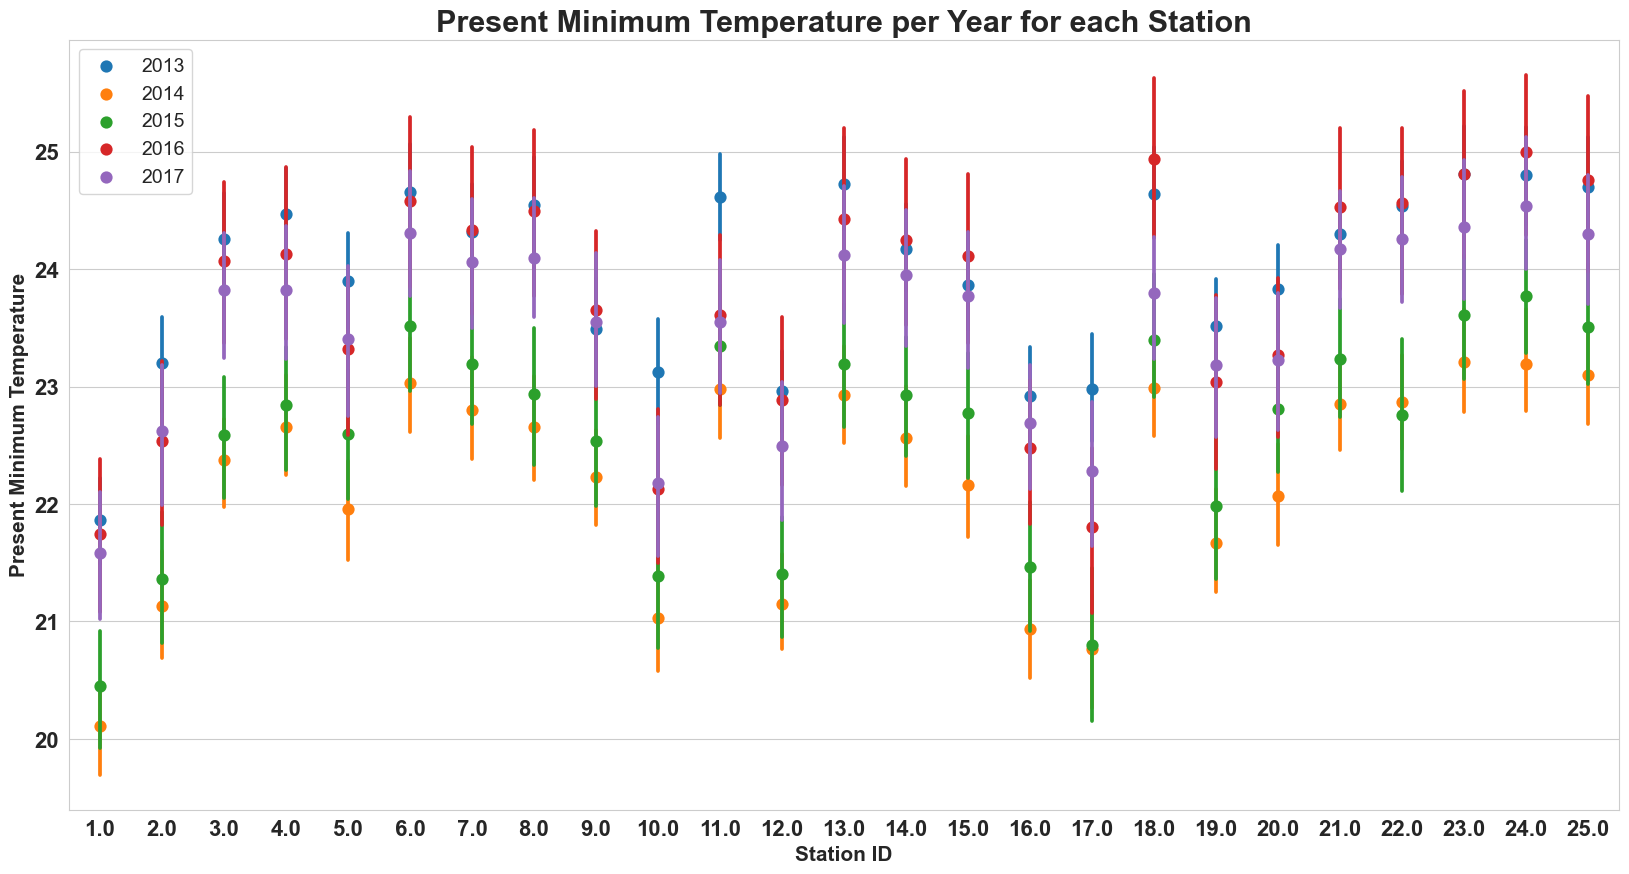

In [32]:
plt.figure(figsize= (20, 10))
sns.set_style('whitegrid')
sns.pointplot(x= 'station', y= 'Present_Tmin', data=df, hue='Year', join=False)
plt.title('Present Minimum Temperature per Year for each Station', fontsize= 22, fontweight='bold')
plt.xlabel('Station ID', {'fontsize' : 15,'fontweight' : 'bold'})
plt.ylabel('Present Minimum Temperature', {'fontsize' : 15,'fontweight' : 'bold'})
plt.xticks(fontsize = 16, fontweight = 'bold')
plt.yticks(fontsize = 16, fontweight = 'bold')
plt.legend(fontsize=14)

<AxesSubplot:xlabel='Month', ylabel='Solar radiation'>

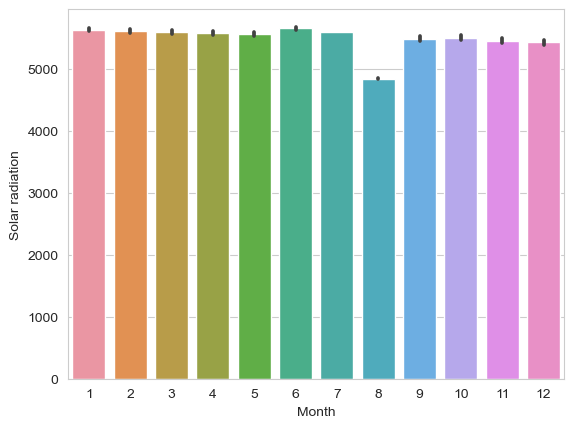

In [33]:
sns.barplot(x=df['Month'], y= df['Solar radiation'])

<AxesSubplot:xlabel='Next_Tmax', ylabel='Solar radiation'>

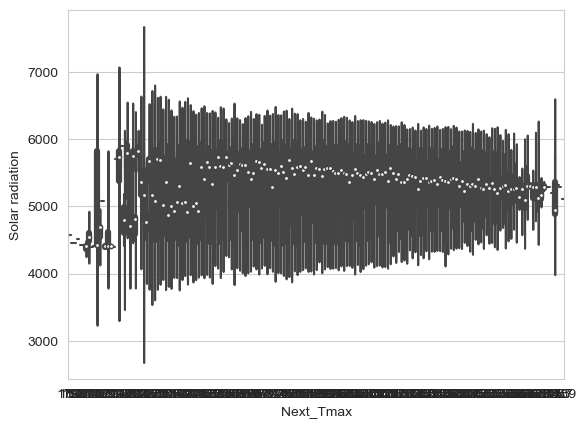

In [34]:
sns.violinplot(x=df['Next_Tmax'], y=df['Solar radiation'])

## Exploration of Target Variable

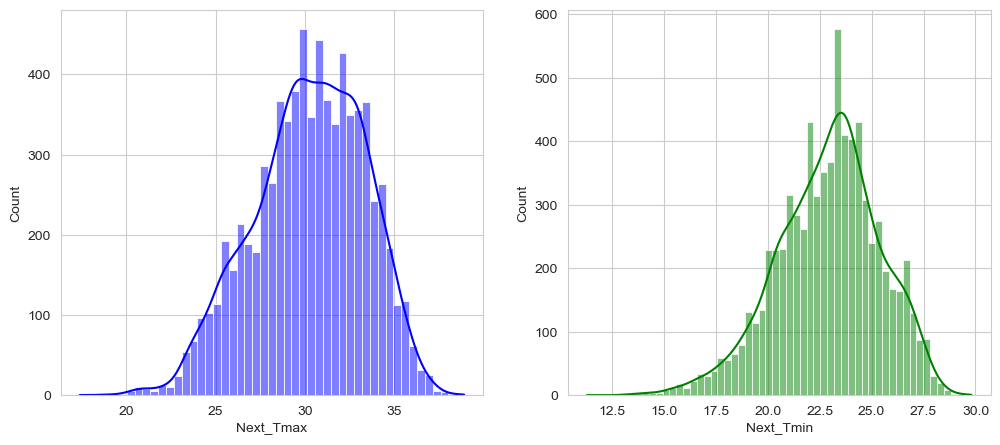

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True, color= 'b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True, color= 'g')
plt.show()

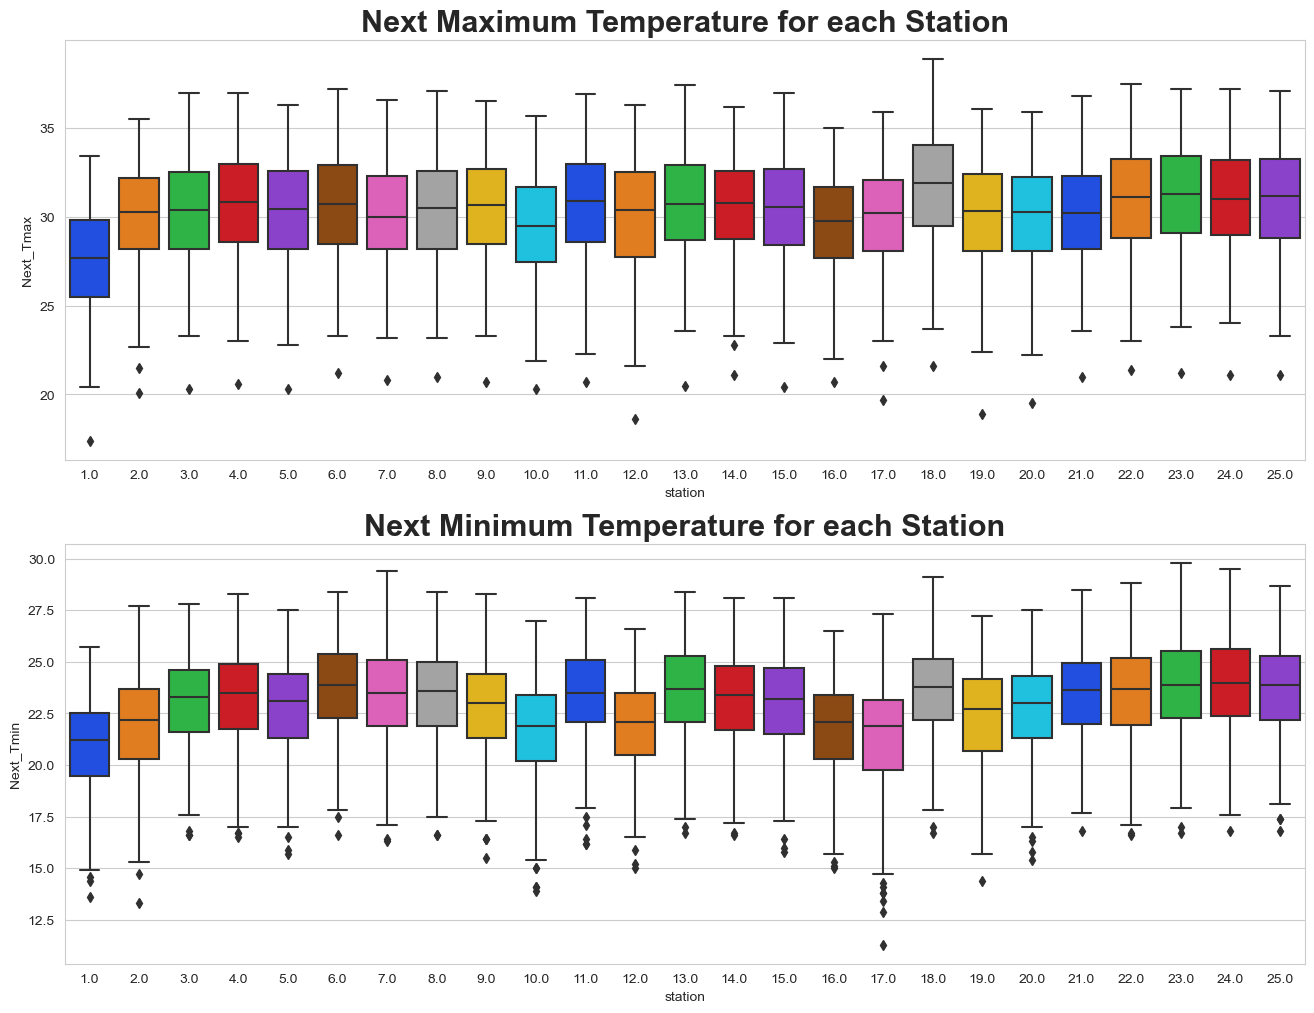

In [36]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df['Next_Tmax'],data=df,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(df['station'],df['Next_Tmin'],data=df,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

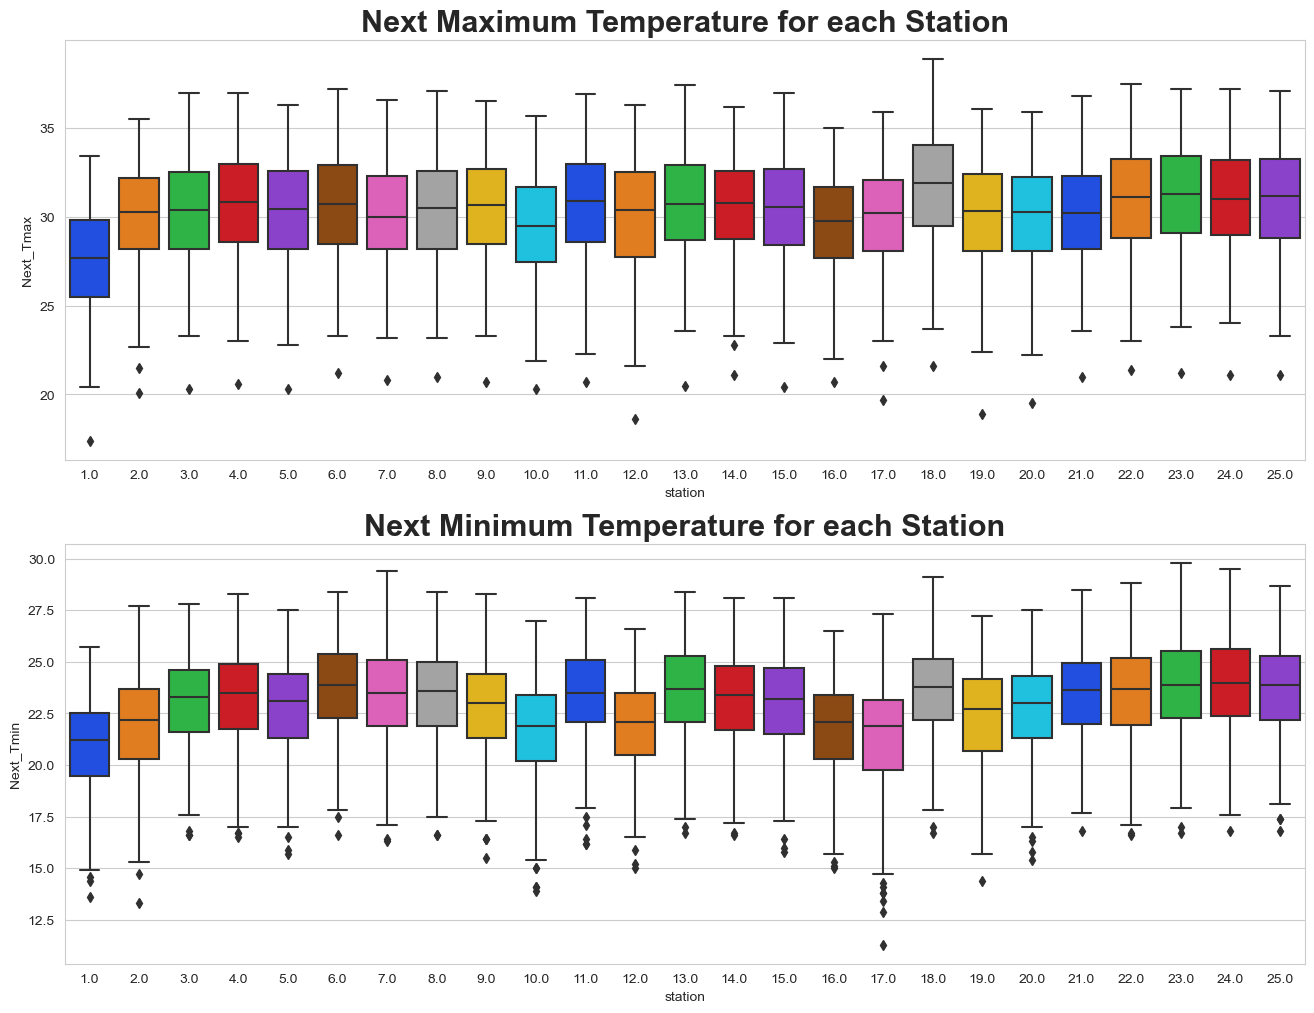

In [37]:
plt.figure(figsize =(16,12))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df['Next_Tmax'], data=df, palette= 'bright')
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(df['station'], df['Next_Tmin'], data=df, palette = 'bright')
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

## Next Maximum Temoerature vs cloud cover

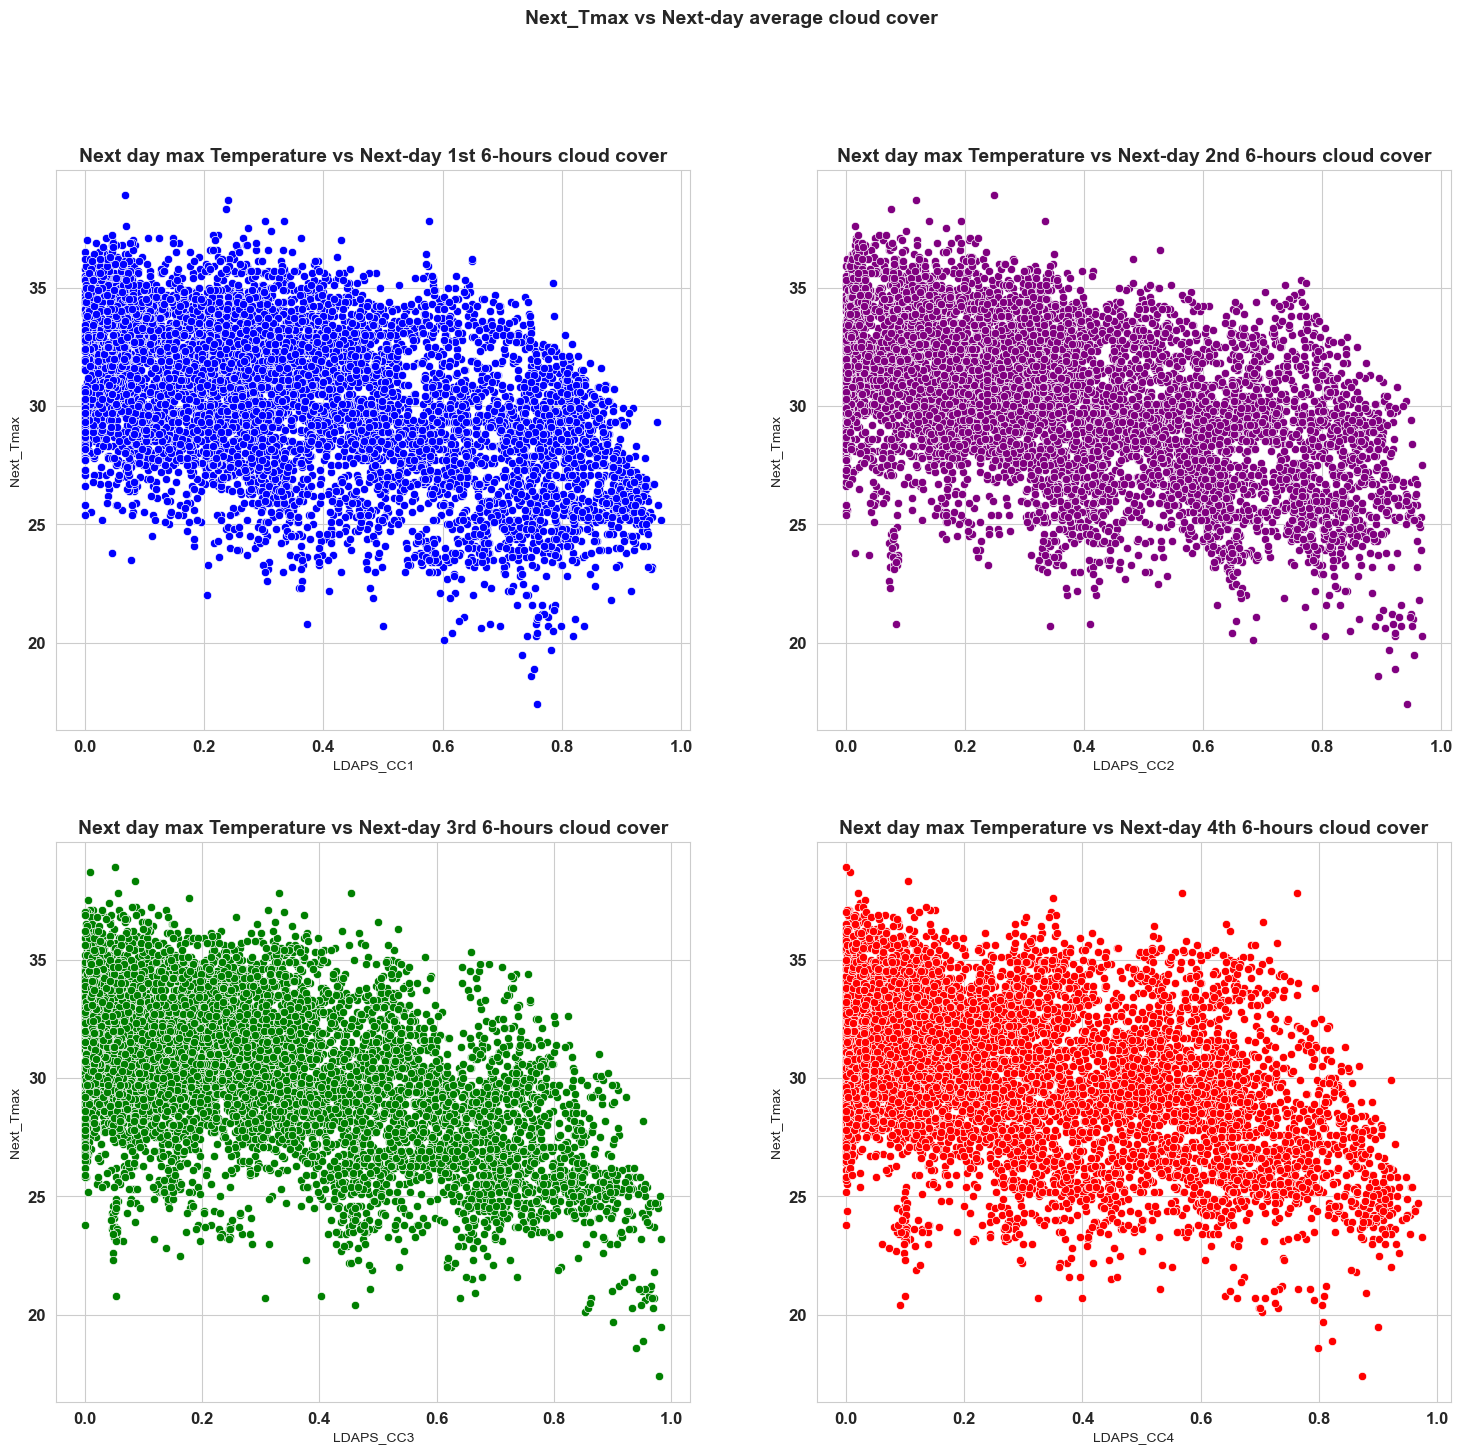

In [38]:
plt.figure(figsize = (18,16))
plt.suptitle('Next_Tmax vs Next-day average cloud cover', fontsize =14,fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature vs Next-day 1st 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1', y ='Next_Tmax', data= df , color='b')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature vs Next-day 2nd 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2', y ='Next_Tmax', data= df , color='purple')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature vs Next-day 3rd 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3', y ='Next_Tmax', data= df , color='g')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature vs Next-day 4th 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4', y ='Next_Tmax', data= df , color='r')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.show()

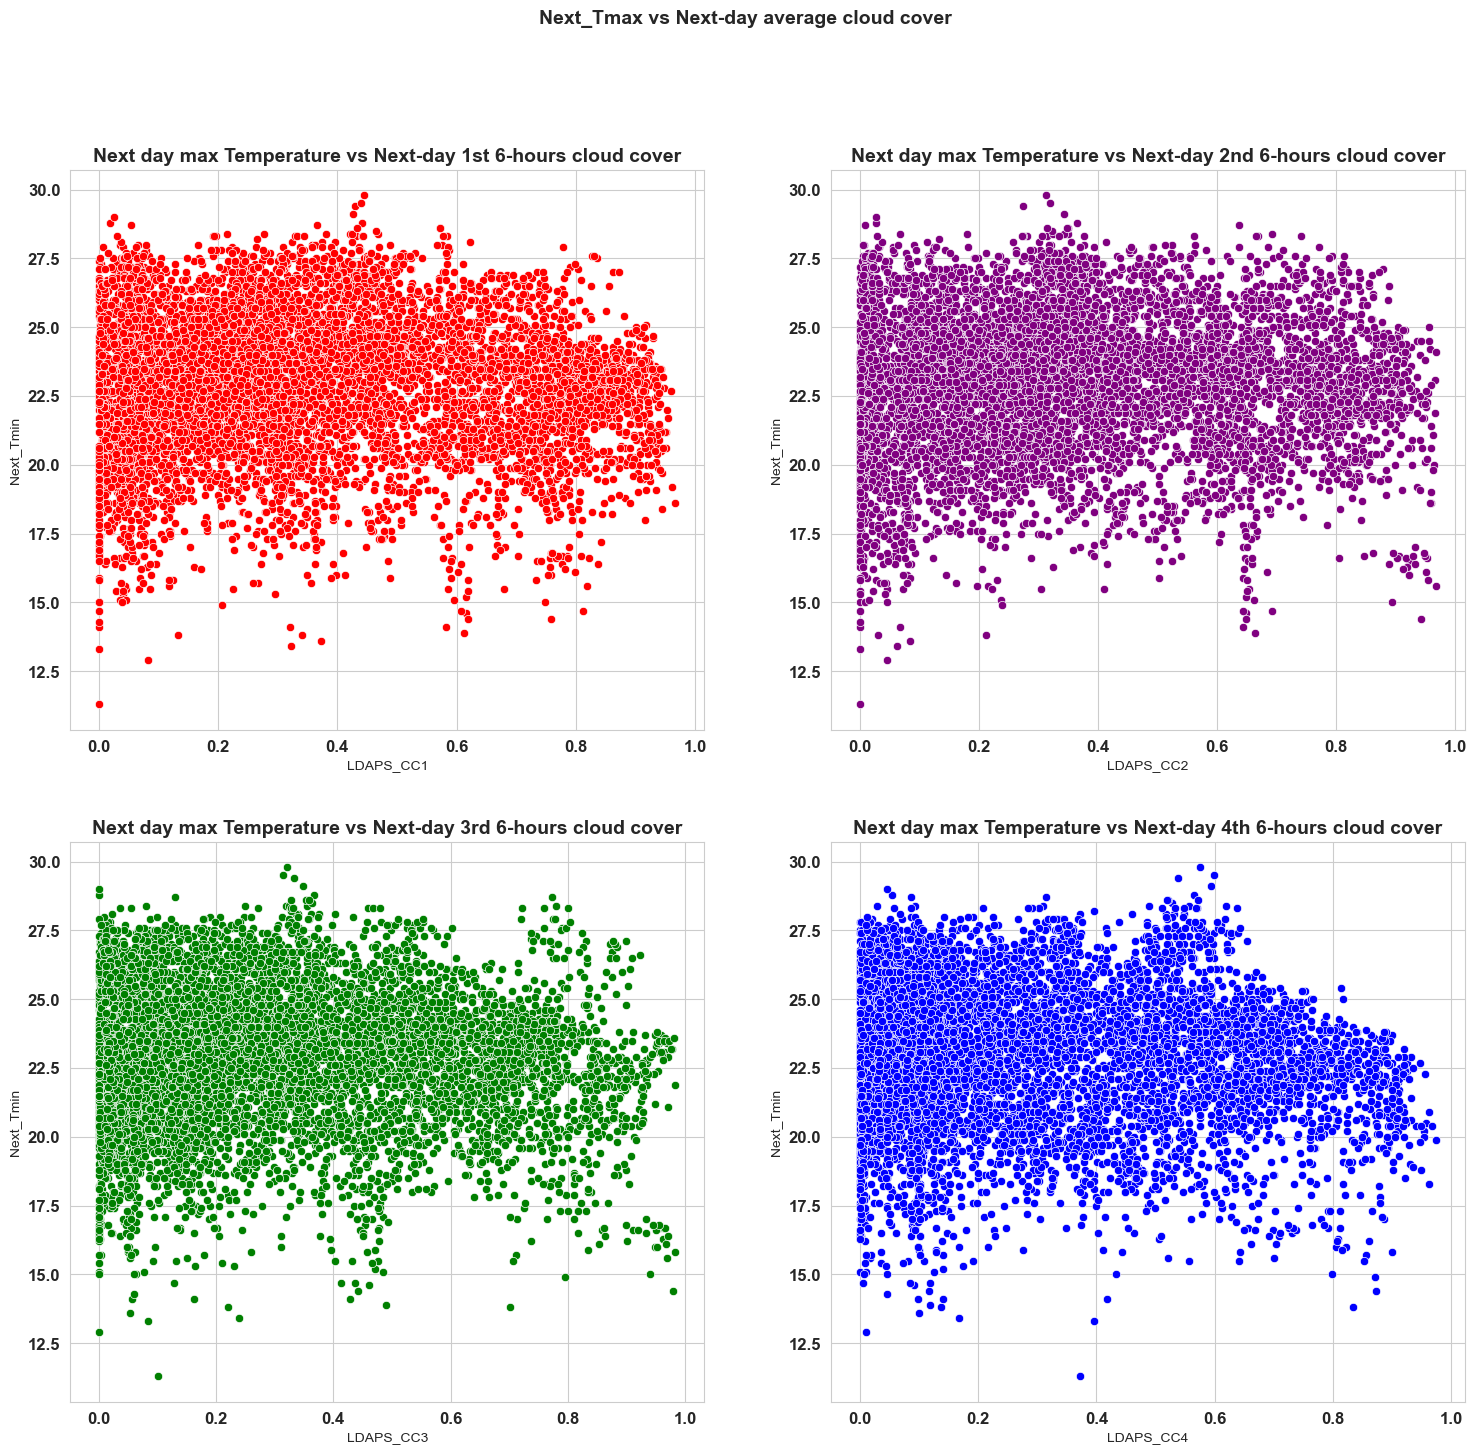

In [39]:
plt.figure(figsize = (18,16))
plt.suptitle('Next_Tmax vs Next-day average cloud cover', fontsize =14,fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature vs Next-day 1st 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1', y ='Next_Tmin', data= df , color='r')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature vs Next-day 2nd 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2', y ='Next_Tmin', data= df , color='purple')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature vs Next-day 3rd 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3', y ='Next_Tmin', data= df , color='g')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature vs Next-day 4th 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4', y ='Next_Tmin', data= df , color='b')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.show()

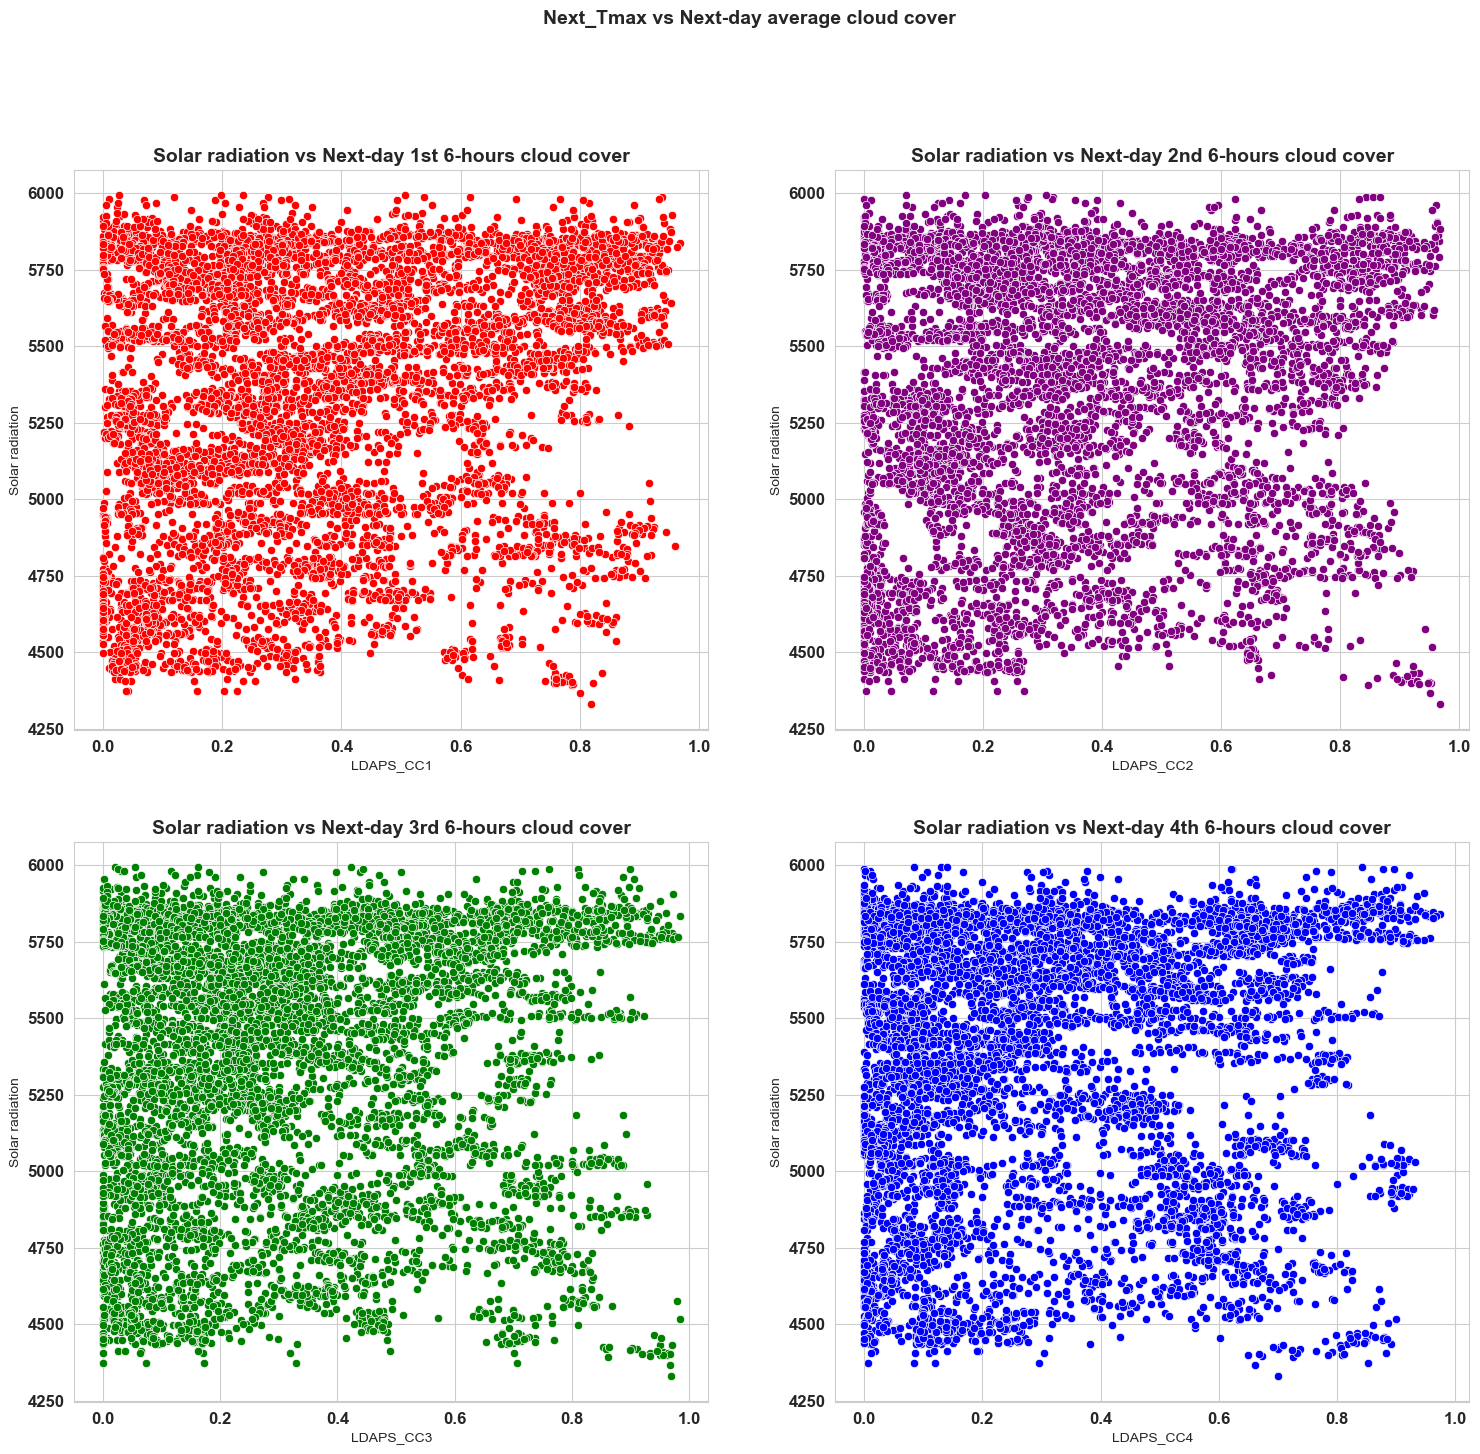

In [40]:
plt.figure(figsize = (18,16))
plt.suptitle('Next_Tmax vs Next-day average cloud cover', fontsize =14,fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation vs Next-day 1st 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1', y ='Solar radiation', data= df , color='r')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation vs Next-day 2nd 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2', y ='Solar radiation', data= df , color='purple')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation vs Next-day 3rd 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3', y ='Solar radiation', data= df , color='g')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation vs Next-day 4th 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4', y ='Solar radiation', data= df , color='b')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.show()

## Precipitation vs Solar radiation

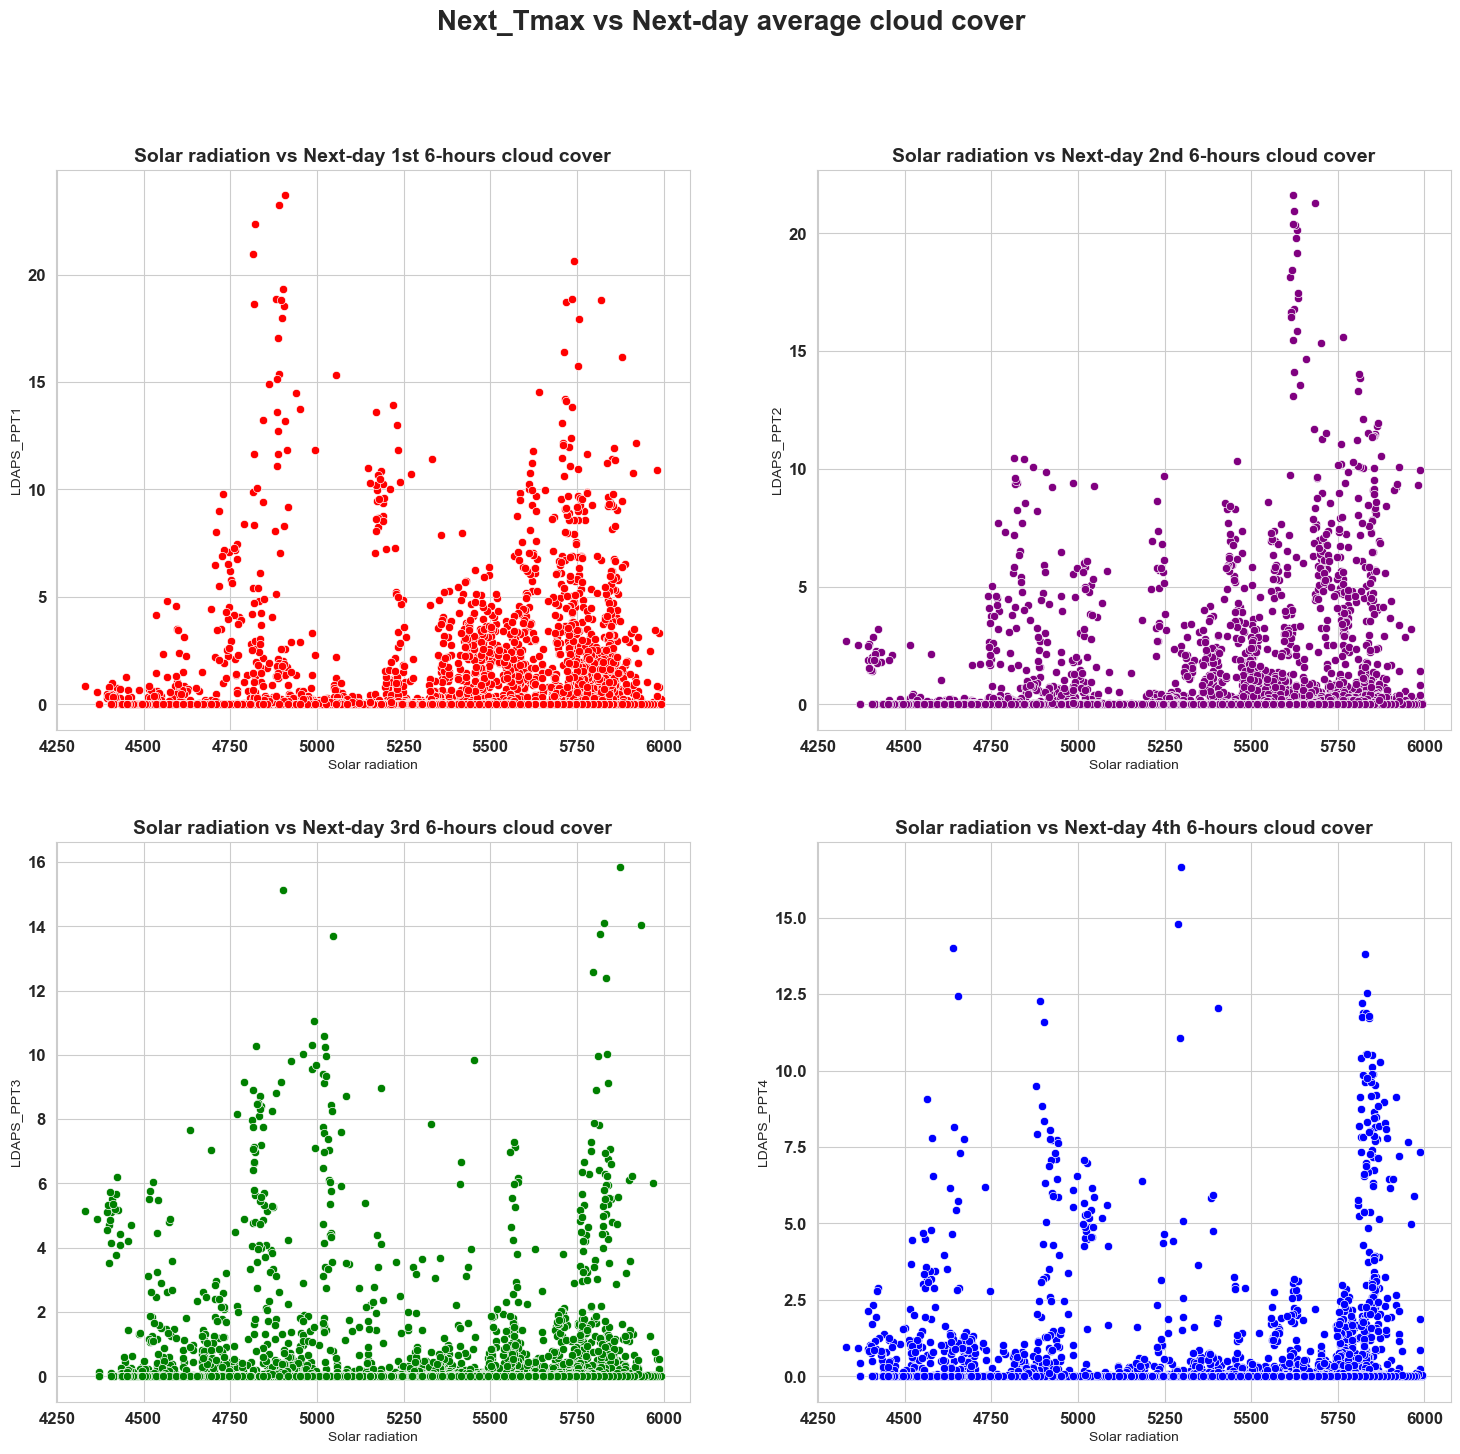

In [41]:
plt.figure(figsize = (18,16))
plt.suptitle('Next_Tmax vs Next-day average cloud cover', fontsize =20,fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation vs Next-day 1st 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1', x ='Solar radiation', data= df , color='r')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation vs Next-day 2nd 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2', x ='Solar radiation', data= df , color='purple')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation vs Next-day 3rd 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3', x ='Solar radiation', data= df , color='g')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation vs Next-day 4th 6-hours cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4', x ='Solar radiation', data= df , color='b')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.show()

<AxesSubplot:xlabel='Month', ylabel='LDAPS_PPT1'>

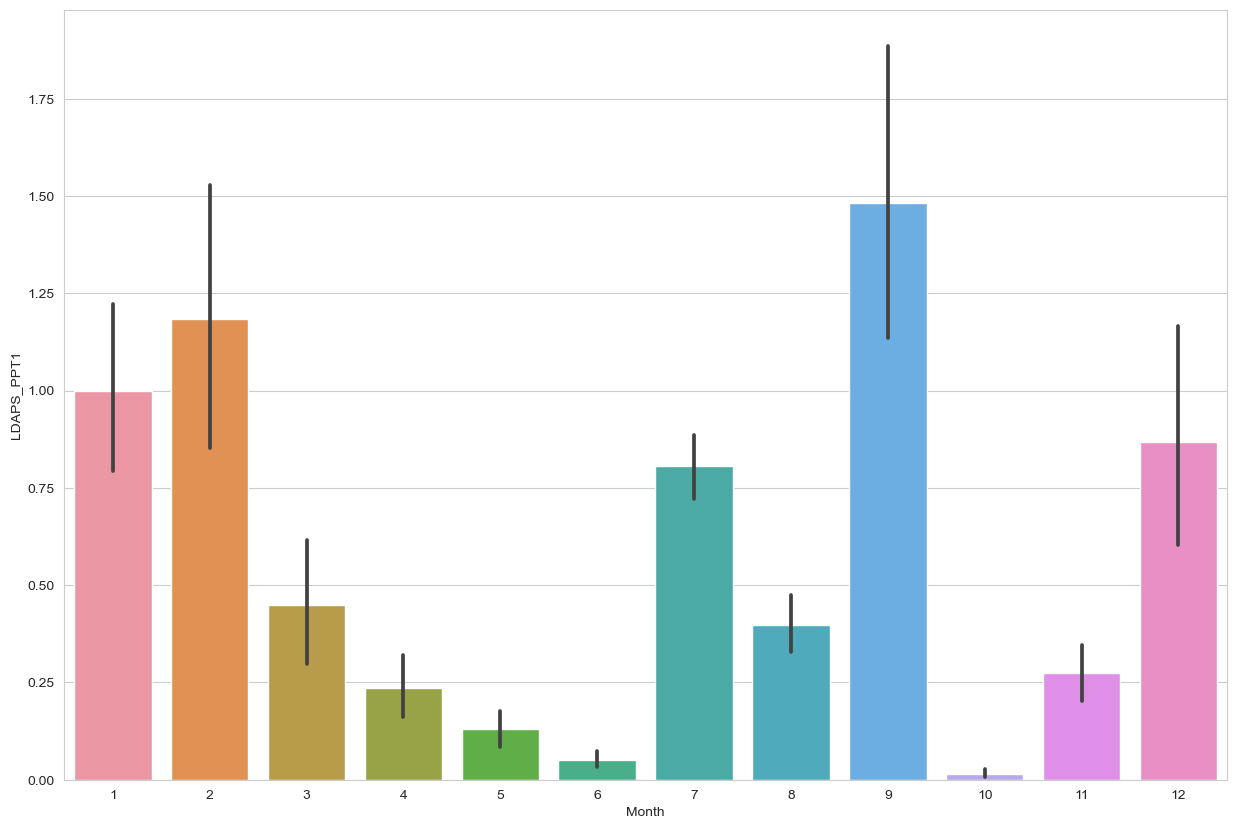

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'])

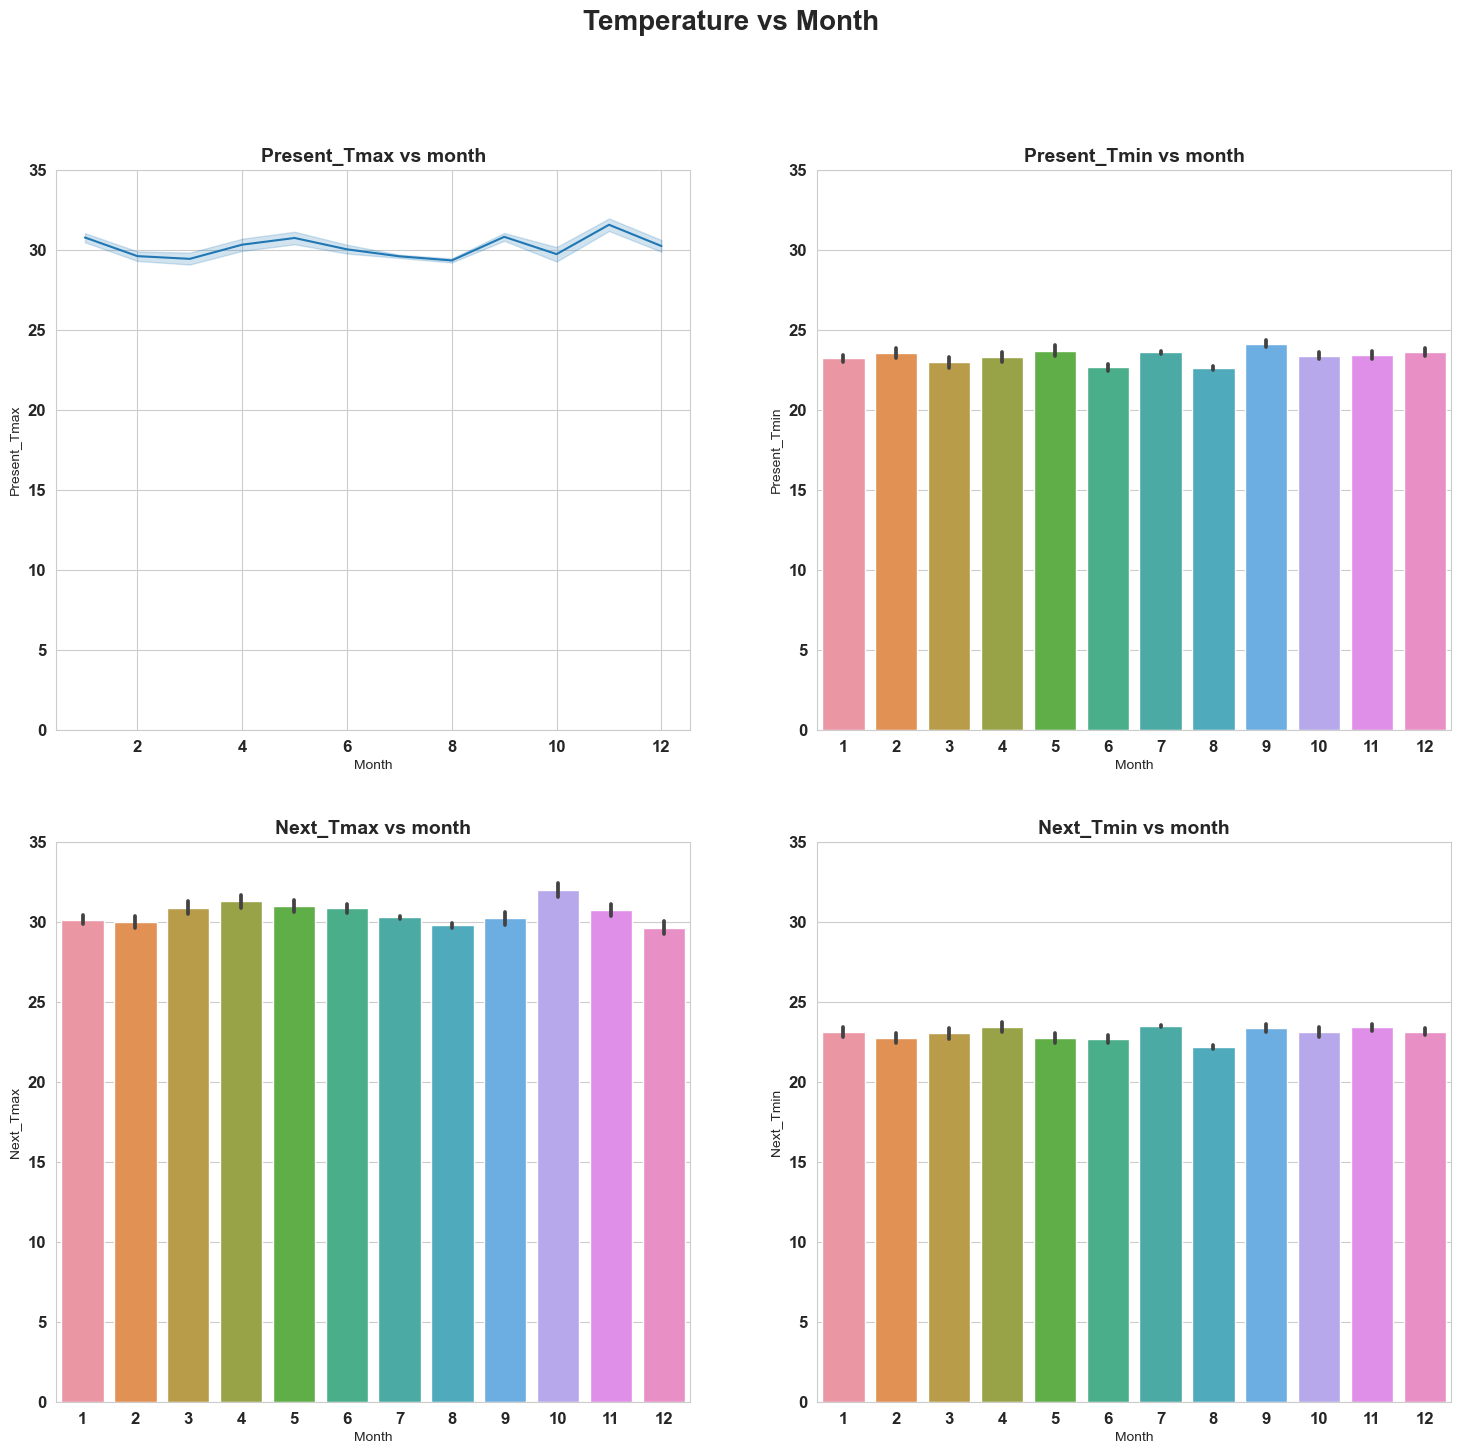

In [42]:
plt.figure(figsize = (18,16))
plt.suptitle('Temperature vs Month', fontsize =20,fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax vs month', fontsize=14, fontweight='bold')
axes= sns.lineplot(y='Present_Tmax', x ='Month', data= df)
axes.set_ylim([0,35])
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin vs month', fontsize=14, fontweight='bold')
axes= sns.barplot(y='Present_Tmin', x ='Month', data= df)
axes.set_ylim([0,35])
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax vs month', fontsize=14, fontweight='bold')
axes= sns.barplot(y='Next_Tmax', x ='Month', data= df)
axes.set_ylim([0,35])
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin vs month', fontsize=14, fontweight='bold')
axes= sns.barplot(y='Next_Tmin', x ='Month', data= df)
axes.set_ylim([0,35])
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.show()

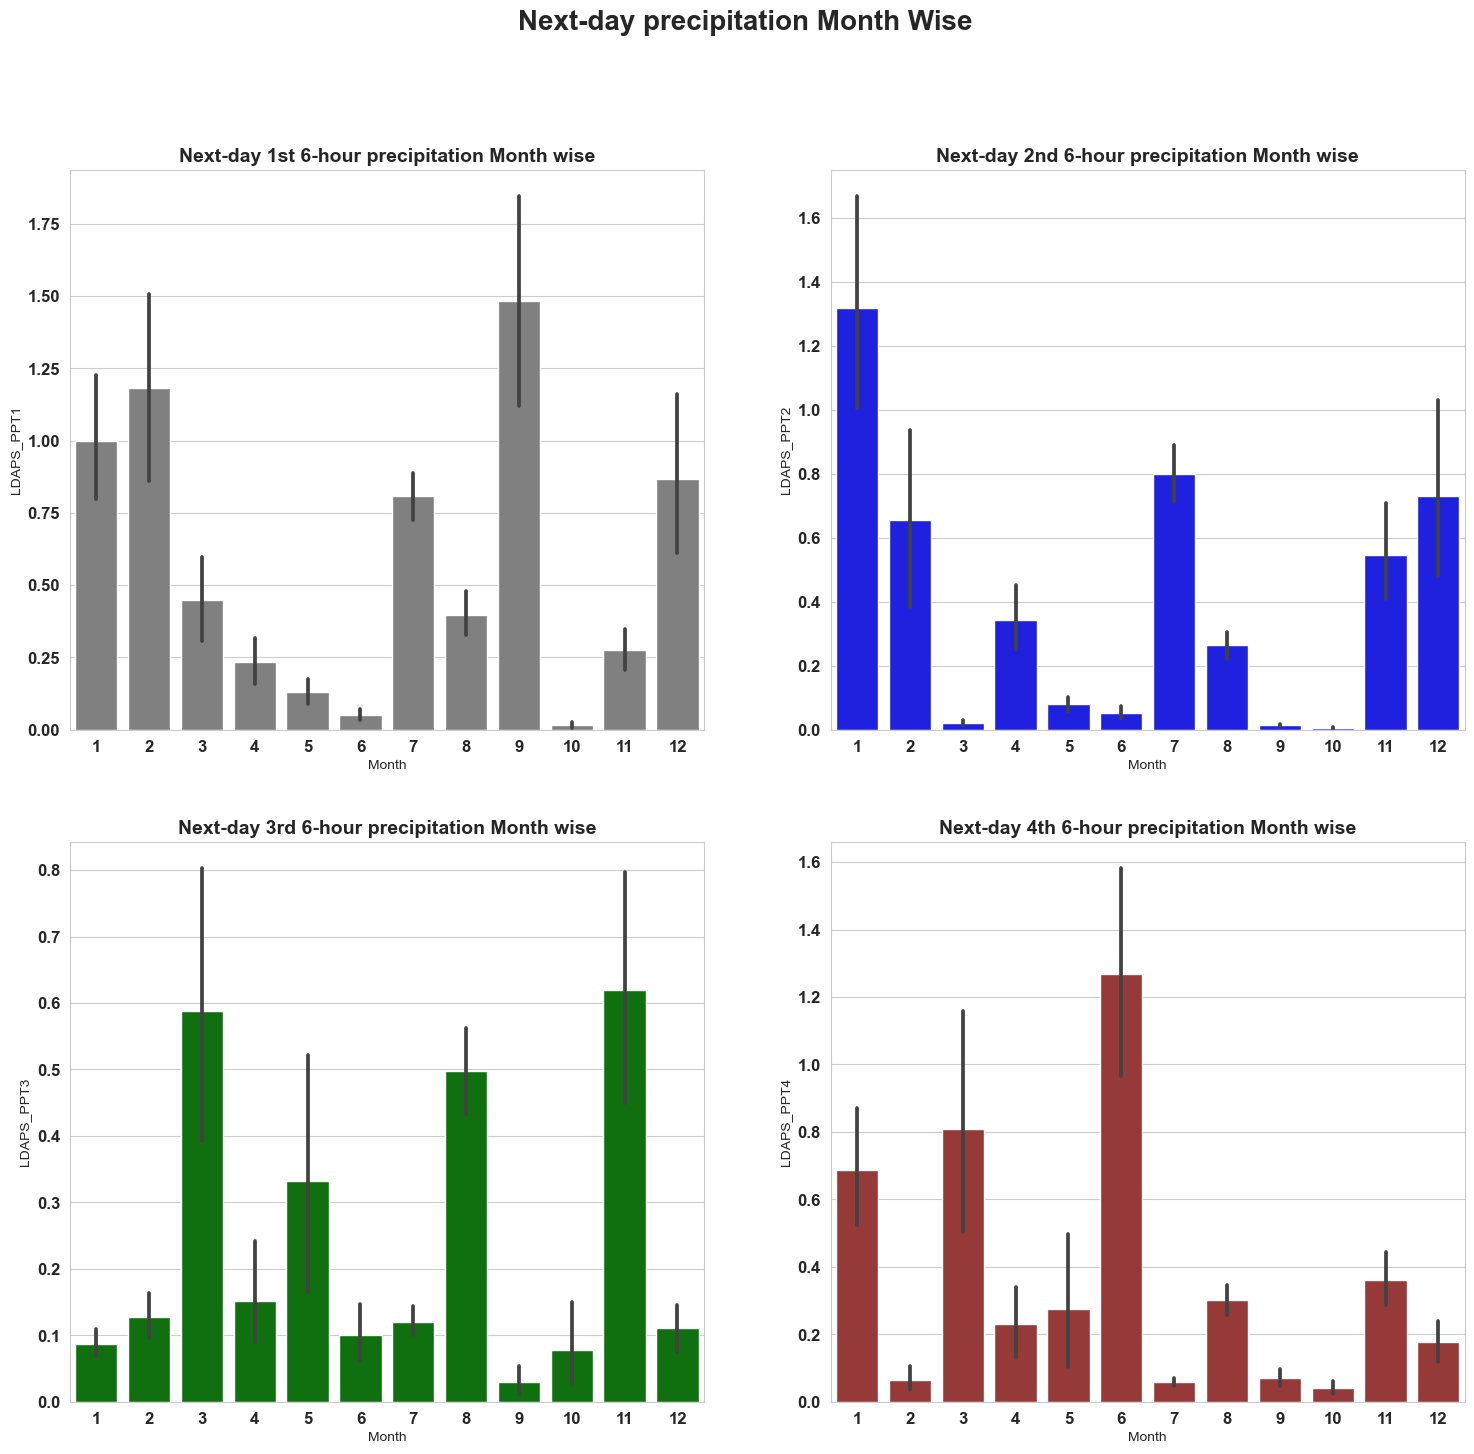

In [43]:
plt.figure(figsize = (18,16))
plt.suptitle('Next-day precipitation Month Wise', fontsize =20,fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour precipitation Month wise', fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'],y = df['LDAPS_PPT1'], data= df , color='grey')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour precipitation Month wise', fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'],y = df['LDAPS_PPT2'], data= df , color='b')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour precipitation Month wise', fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'],y = df['LDAPS_PPT3'], data= df , color='g')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.subplot(2,2,4)
plt.title('Next-day 4th 6-hour precipitation Month wise', fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'],y = df['LDAPS_PPT4'], data= df , color='brown')
plt.xticks(fontsize =12, fontweight='bold')
plt.yticks(fontsize =12, fontweight='bold')

plt.show()

Minimum Solar raiation : 4329.520508
Maximum Solar raiation : 5992.895996
Average Solar raiation : 5343.72420785672


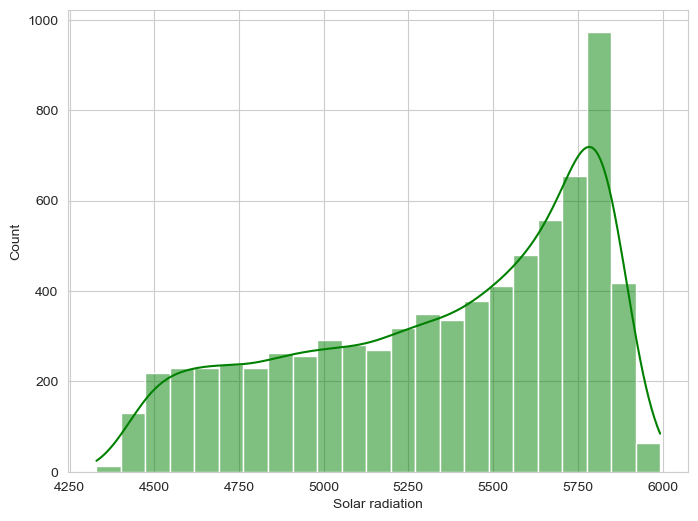

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'], kde=True, color='g')
print('Minimum Solar raiation :', df ['Solar radiation'].min())
print('Maximum Solar raiation :', df ['Solar radiation'].max())
print('Average Solar raiation :', df ['Solar radiation'].mean())

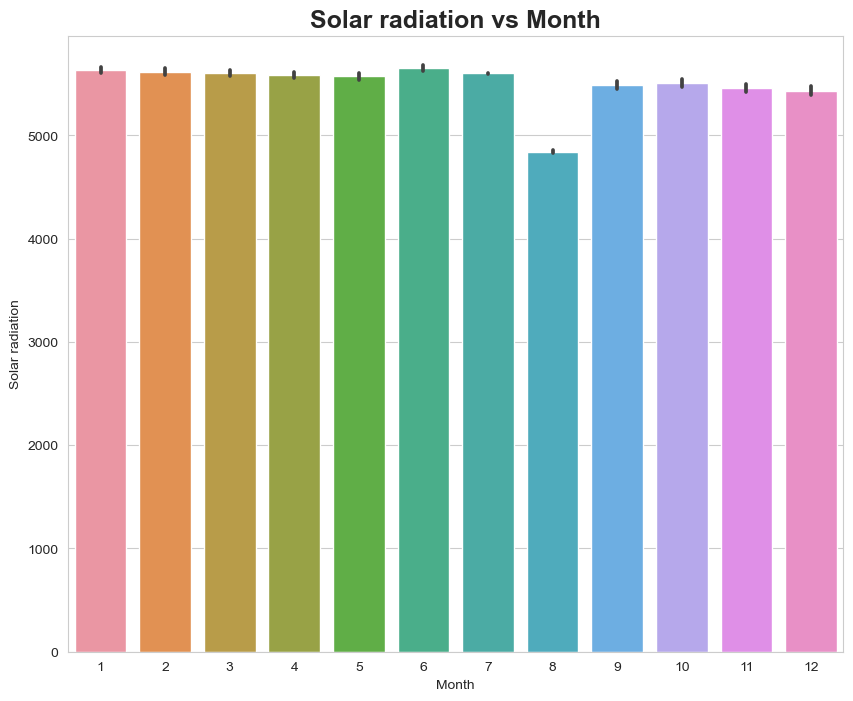

In [45]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation vs Month', fontsize=18, fontweight='bold')
plt.show()

Minimum Wind Speed : 2.882579625 m/s
Maxmum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.094096699159837 m/s


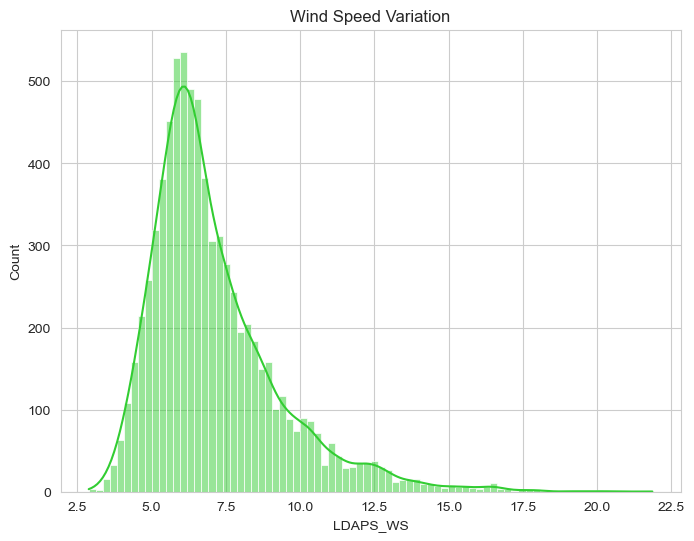

In [46]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True, color= 'limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :', df['LDAPS_WS'].min(),'m/s')
print('Maxmum Wind Speed :', df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :', df['LDAPS_WS'].mean(),'m/s')

\Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
\Minimum RHmin is 98.5247345 % and Maximum RHmin is 98.5247345 %


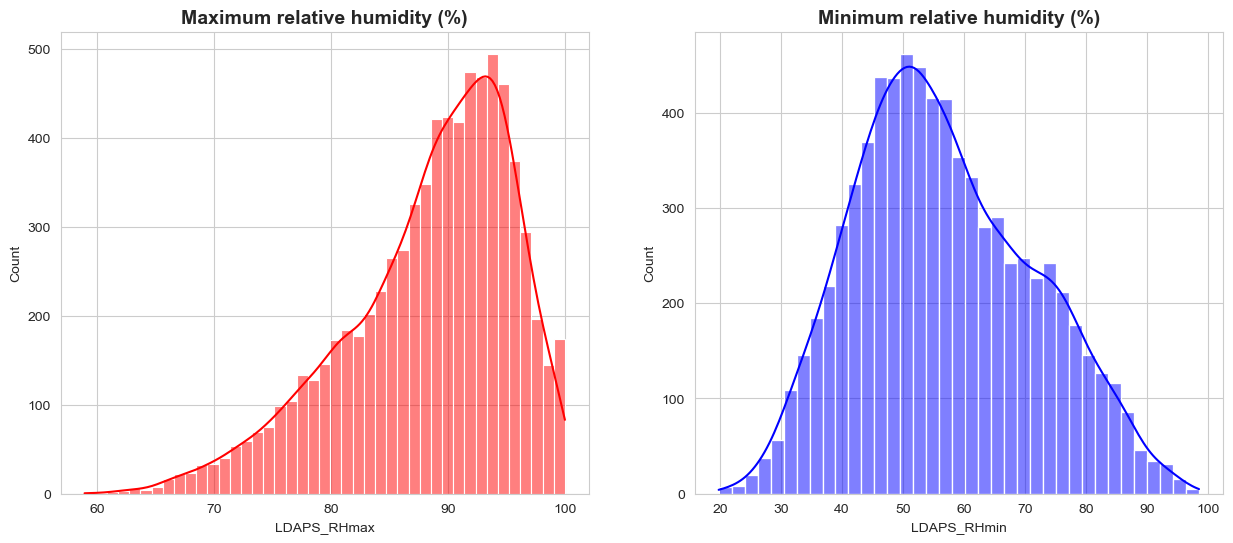

In [49]:
plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'], kde=True, color='r')
plt.title('Maximum relative humidity (%)', fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde= True, color='b')
plt.title('Minimum relative humidity (%)', fontsize=14, fontweight='bold')
print('\Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('\Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].max(),df['LDAPS_RHmin'].max()))

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988046


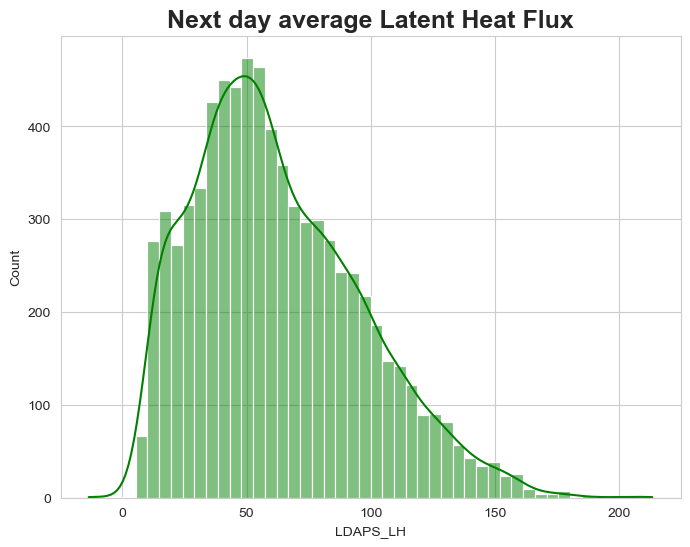

In [50]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_LH'], kde=True, color='g')
plt.title('Next day average Latent Heat Flux', fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :', df ['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :', df ['LDAPS_LH'].max())
print('Average Latent Heat Flux :', df ['LDAPS_LH'].mean())

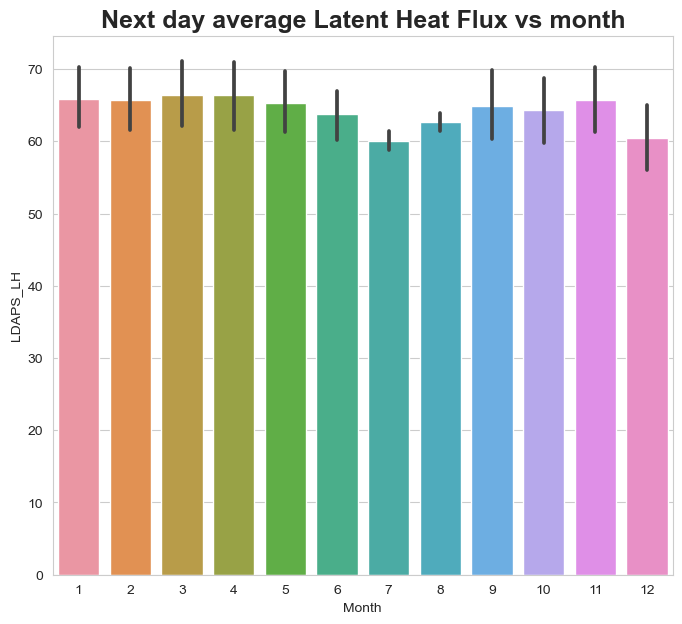

In [51]:
plt.figure(figsize= (8,7))
sns.barplot(y= df['LDAPS_LH'], x= df['Month'])
plt.title('Next day average Latent Heat Flux vs month', fontsize= 18, fontweight='bold')
plt.show()

# Encoding categorical data

In [52]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [53]:
Category  = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [54]:
df.drop(['Date'], axis=1, inplace=True)

# Features selection and Engineering

### 1. Outliers Detection and Removal

In [55]:
df.shape

(7588, 29)

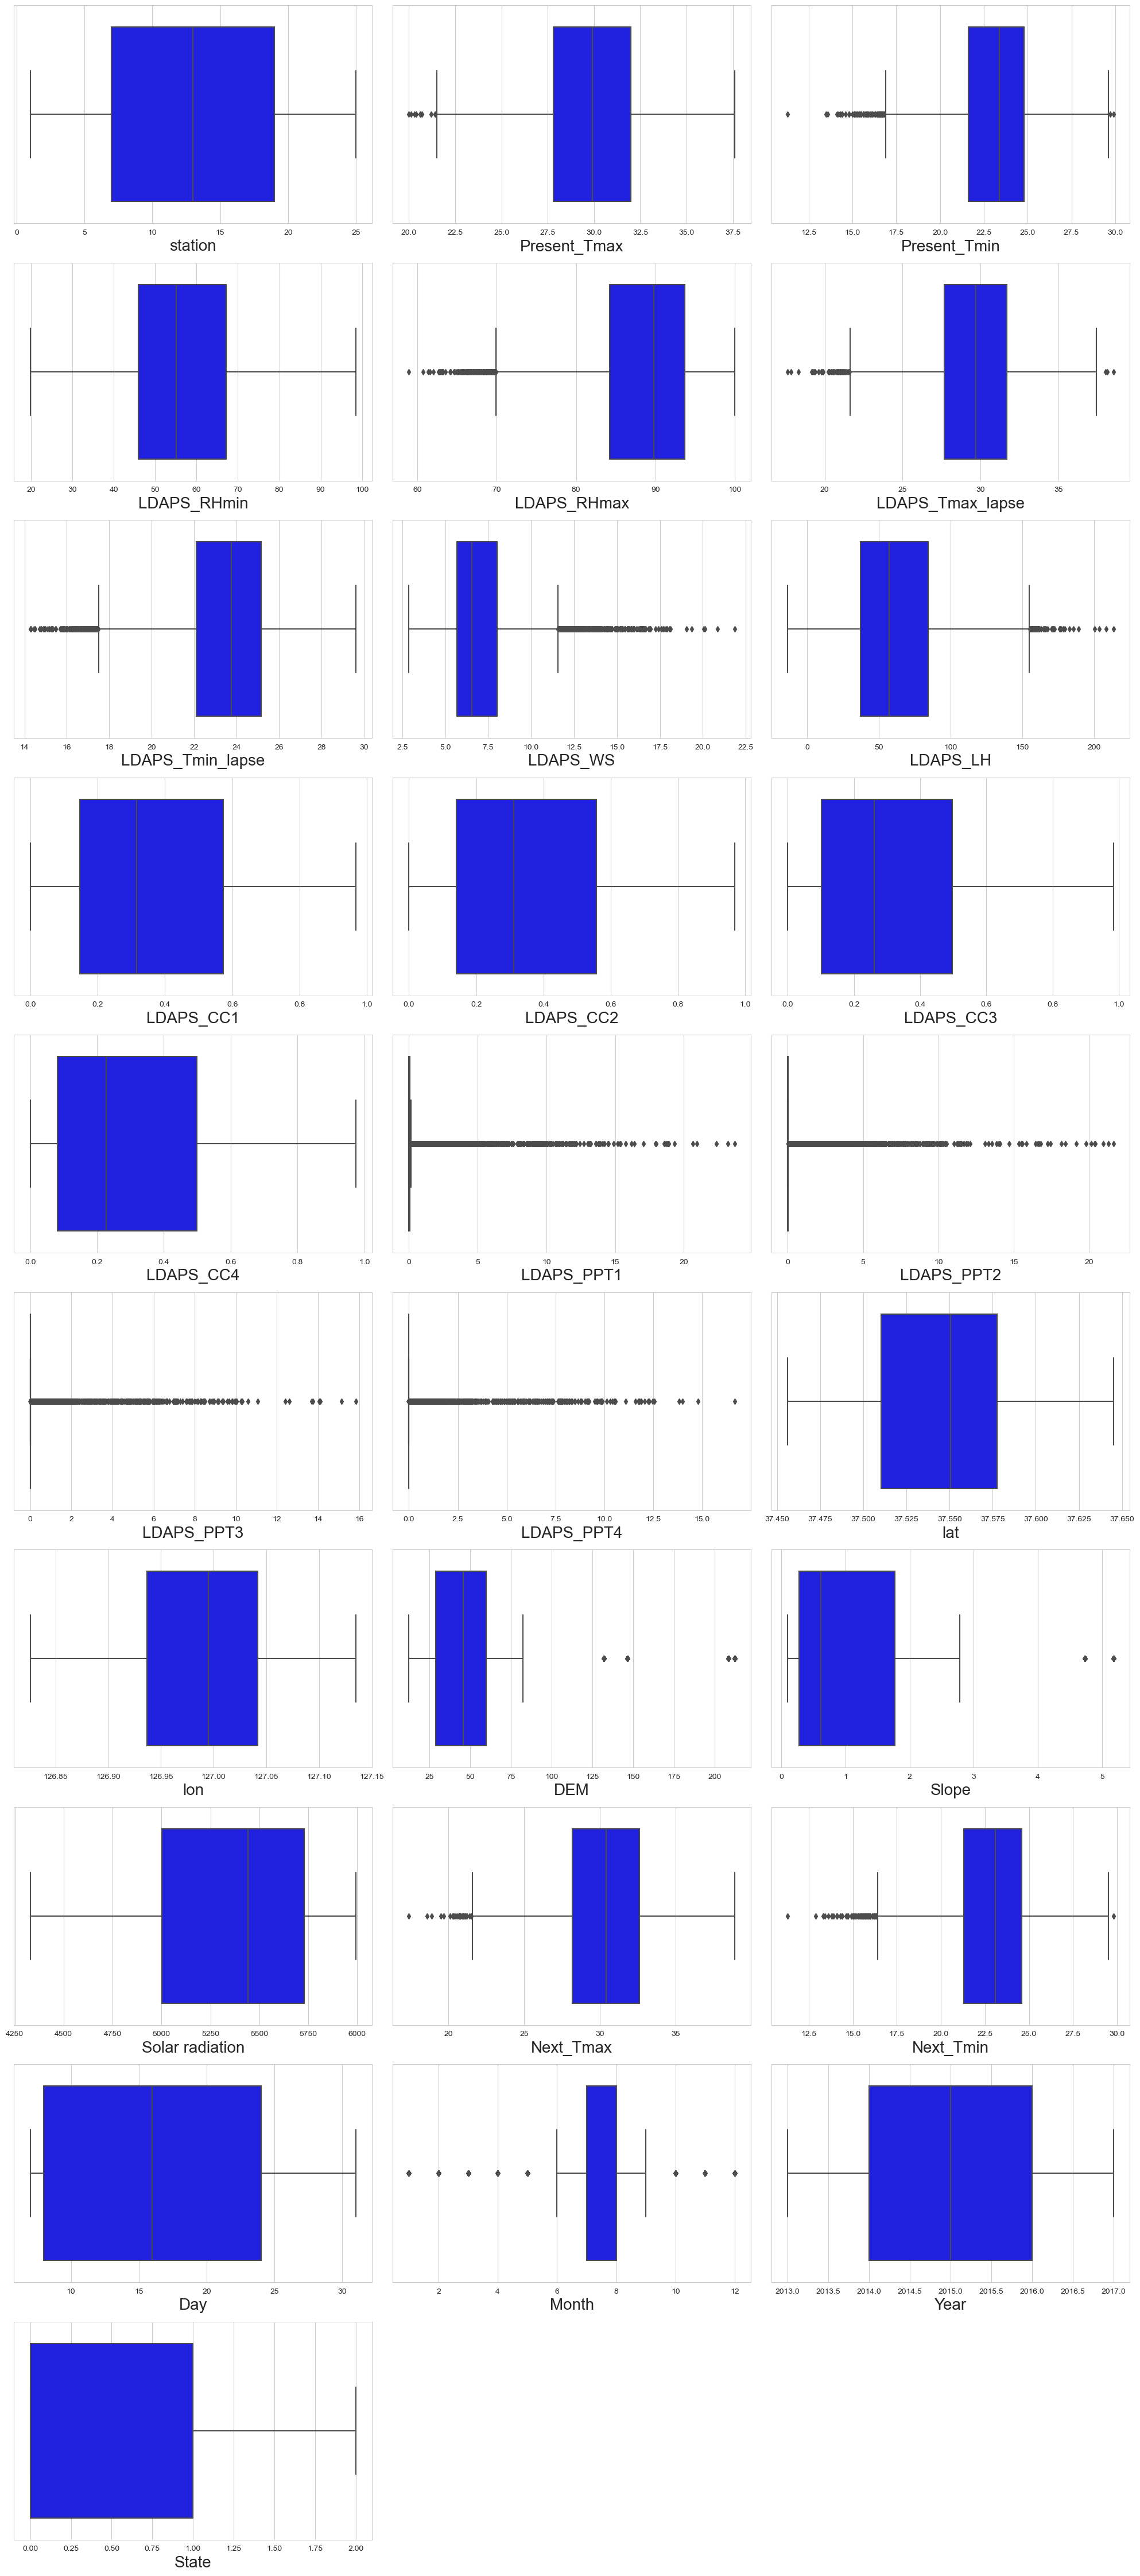

In [56]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Outliers removal using Zscore method

In [57]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold=3 
df1 = df[(z<3).all(axis = 1)]

print('Shape of the dataframe before removing outliers: ',df.shape)
print('Shape of the dataframe after removing outliers: ',df1.shape)
print('Percentage of data loss post outlier removal:',(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal: 11.188719030047443


# Skewness of features

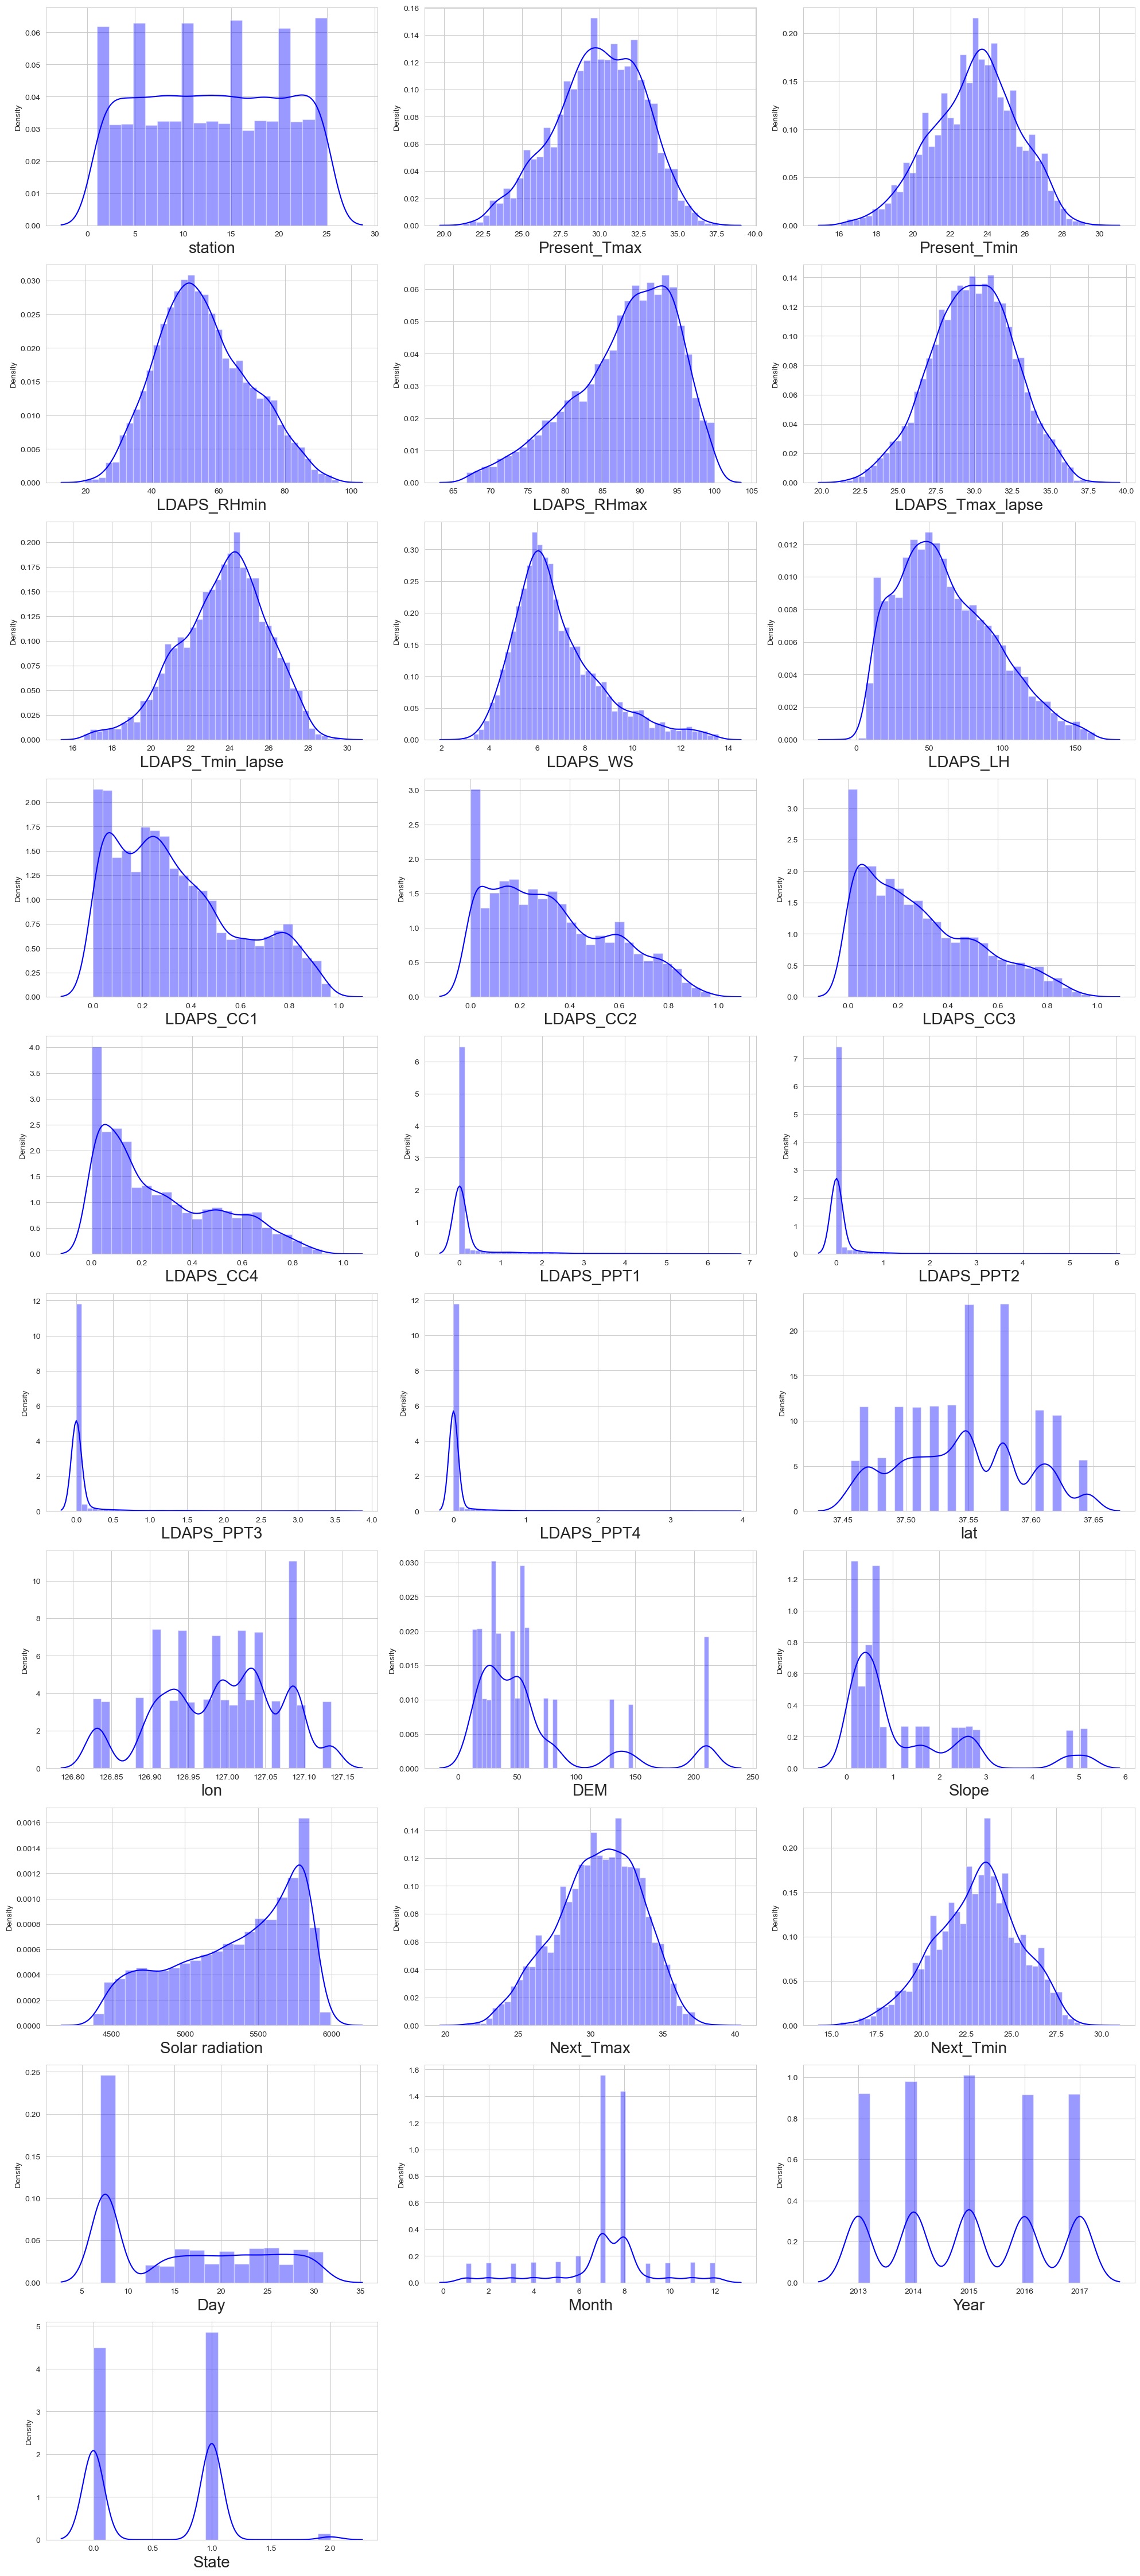

In [58]:
plt.figure(figsize=(20,45),facecolor='white')
sns.set_palette('rainbow')
plotnumber=1

for column in df:
    if plotnumber<29:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [59]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

In [60]:
skew=['LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC3', 'LDAPS_CC4',
     'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

df[skew]= scaler.fit_transform(df[skew].values)

# Correlation

In [61]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

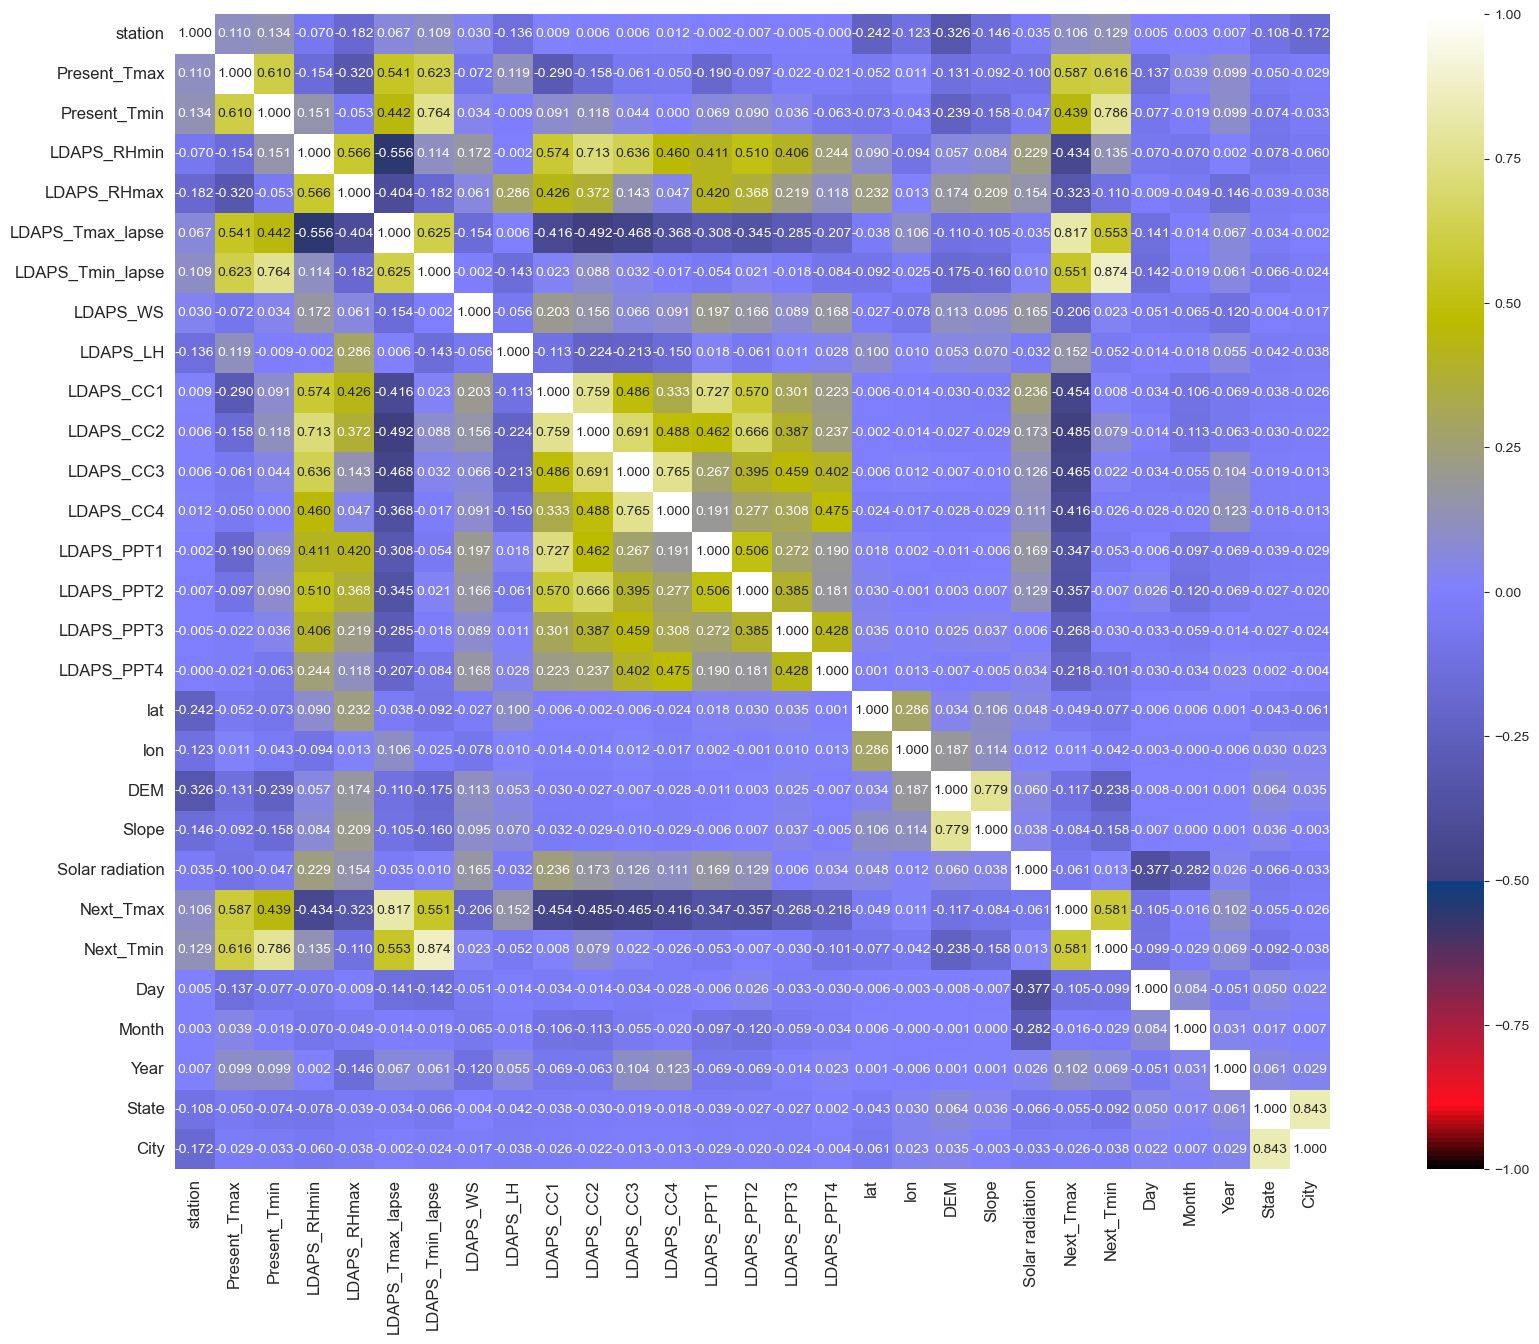

In [62]:
plt.figure(figsize= (25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
           annot_kws= {'size' : 10}, cmap = 'gist_stern')
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.show()

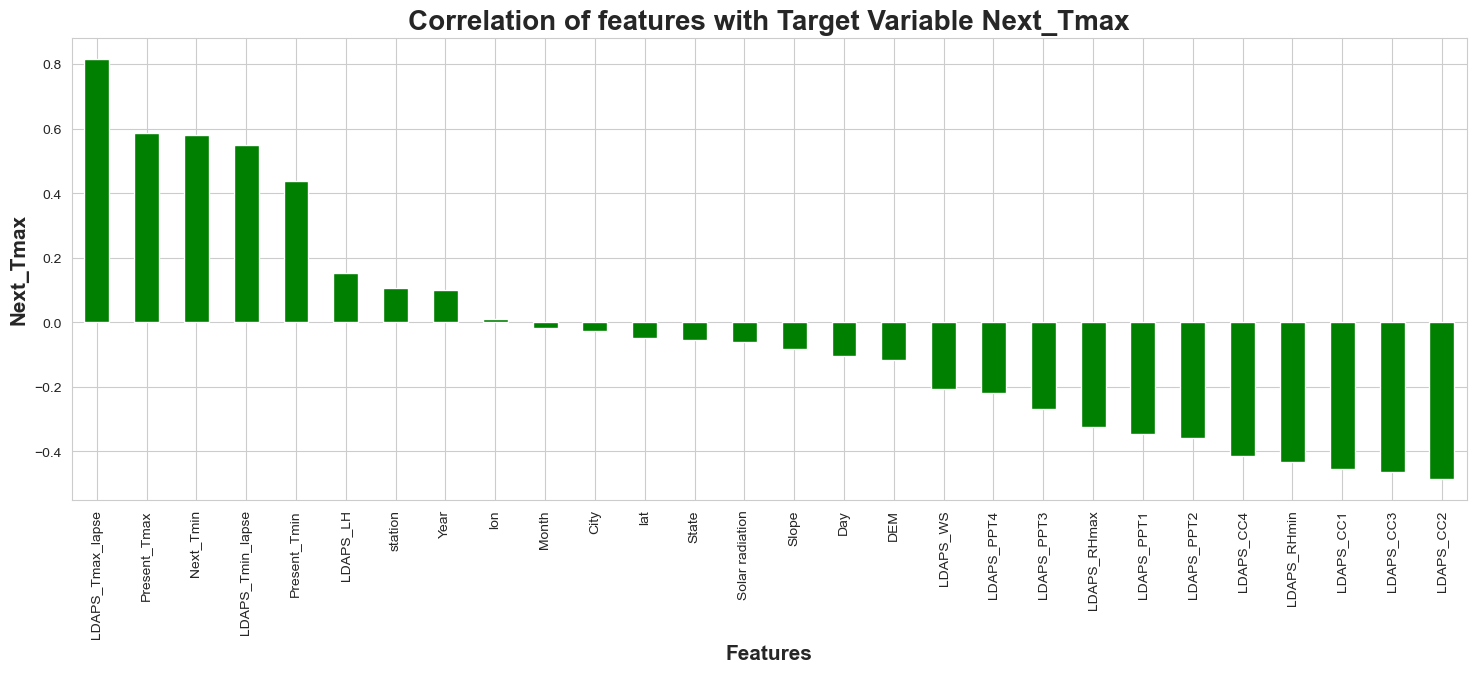

In [63]:
plt.figure(figsize= (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind= 'bar', color= 'g')
plt.xlabel('Features', fontsize=15, fontweight='bold')
plt.ylabel('Next_Tmax', fontsize=15, fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax', fontsize= 20, fontweight='bold')
plt.show()

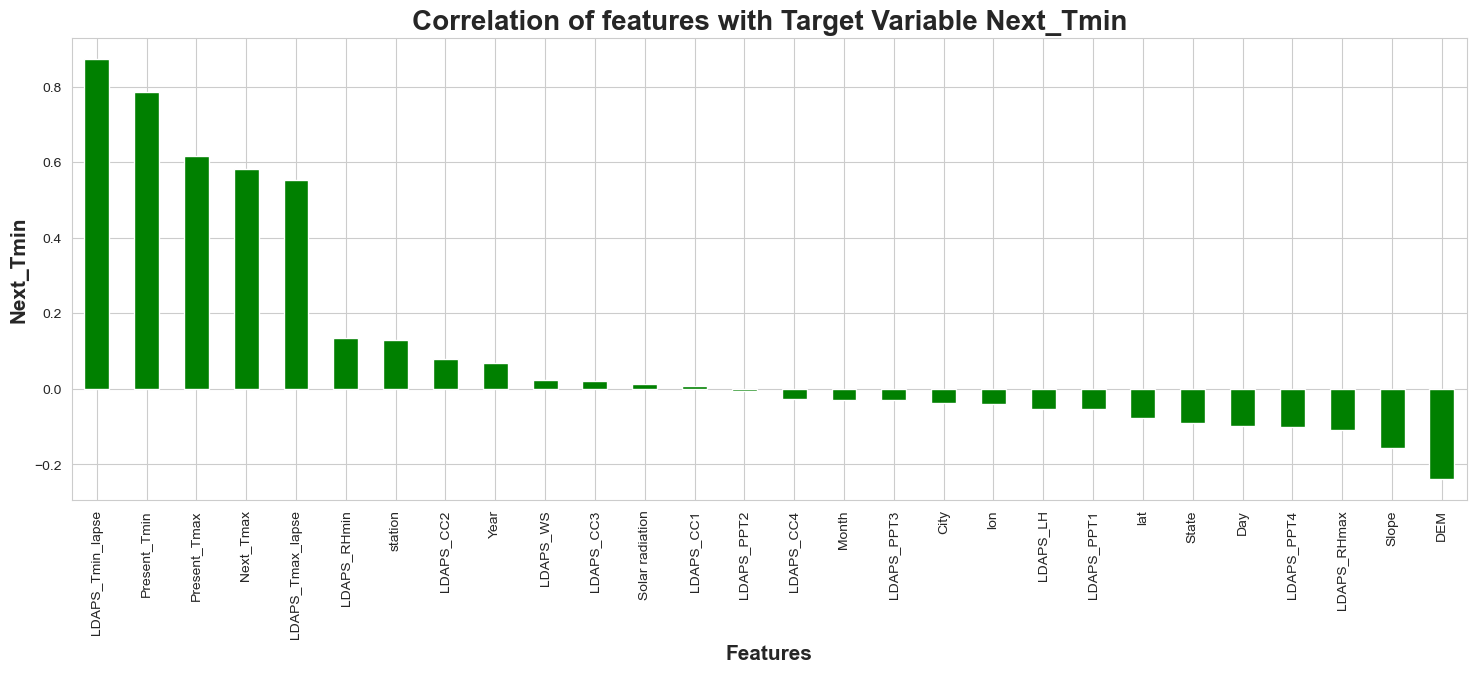

In [64]:
plt.figure(figsize= (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind= 'bar', color= 'g')
plt.xlabel('Features', fontsize=15, fontweight='bold')
plt.ylabel('Next_Tmin', fontsize=15, fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin', fontsize= 20, fontweight='bold')
plt.show()

## Standard Scaling

In [65]:
X = df.drop(['Next_Tmax'], axis= 1)
Y = df['Next_Tmax']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Variance_inflation_factor

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif['Features']= X.columns
vif

VIF values          Features
0     1.353177           station
1     2.849784      Present_Tmax
2     3.383435      Present_Tmin
3     6.077961       LDAPS_RHmin
4     2.614712       LDAPS_RHmax
5     6.650091  LDAPS_Tmax_lapse
6     8.235731  LDAPS_Tmin_lapse
7     1.225322          LDAPS_WS
8     1.523389          LDAPS_LH
9     4.874106         LDAPS_CC1
10    5.533647         LDAPS_CC2
11    4.567857         LDAPS_CC3
12    2.792518         LDAPS_CC4
13    2.601274        LDAPS_PPT1
14    2.174592        LDAPS_PPT2
15    1.592341        LDAPS_PPT3
16    1.601009        LDAPS_PPT4
17    1.310633               lat
18    1.225664               lon
19    3.382228               DEM
20    2.876560             Slope
21    1.487825   Solar radiation
22    5.674284         Next_Tmin
23    1.259835               Day
24    1.122200             Month
25    1.136580              Year
26    3.615665             State
27    3.641816              City

# PCA

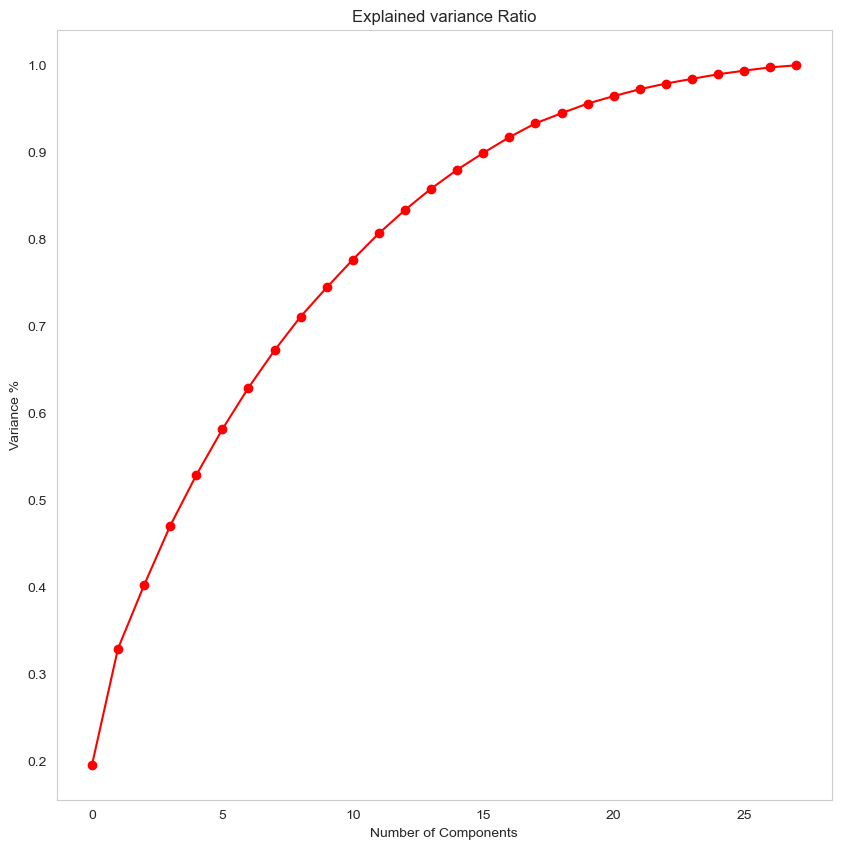

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [69]:
pca_new = PCA(n_components = 15)
x_new = pca_new.fit_transform(X_scale)

In [70]:
principle_x =pd.DataFrame(x_new, columns=np.arange(15))

# Machine Learnings Model Building

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [72]:
x_train, x_test, y_train, y_test = train_test_split(principle_x, Y, random_state=42, test_size=0.33)
print('Training feature matrix size:', x_train.shape)
print('Training target vector size:', y_train.shape)
print('Test feature matrix size:', x_test.shape)
print('Test target vector size:', y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.33, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.8018242128787927 on Random_state 108


## Logistics Regression Model

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n', y_pred)
print('\n')
print('\033[1m'+'Actual Wins :'+'\033[0m\n', Y_test)

Predicted Wins:
 [31.91671752 30.15944717 29.11536556 ... 25.88094278 25.16676324
 32.69812886]


Actual Wins :
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


### Cross Validartion

In [75]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=3)
print('\033[1m'+'Cross Validation Score :', lin_reg,':'+'\033[0m\n')
print('Mean CV Score :', score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6695150338019878


# Appling other ML Models

In [76]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb= AdaBoostRegressor()
gradb= GradientBoostingRegressor()
xgb = XGBRegressor

model = [rf,dtc, XT, BR,adb,gradb,xgb]

for m in model:
    m.fit(X_train, Y_train)
    m.score(X_train, Y_train)
    y_pred = m.predict(X_test)
    print('\n')
    print('\033[1m'+'Error of ', m, ':'+'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_absolute_error(Y_test,y_pred))
    print('Root Mean absolute error :',np.sqrt(mean_absolute_error(Y_test,y_pred)))
    print('\n')
    
    print('\033[1m'+'R2 score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('========================================================================')



Error of  RandomForestRegressor() :
Mean absolute error : 0.7062342625899283
Mean squared error : 0.7062342625899283
Root Mean absolute error : 0.8403774524521278


R2 score :
0.8997516453500725


Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0517086330935252
Mean squared error : 1.0517086330935252
Root Mean absolute error : 1.0255284652770615


R2 score :
0.7643404817706121


Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6102419064748204
Mean squared error : 0.6102419064748204
Root Mean absolute error : 0.781179816991466


R2 score :
0.9248011823780845


Error of  BaggingRegressor() :
Mean absolute error : 0.7645188848920863
Mean squared error : 0.7645188848920863
Root Mean absolute error : 0.8743677057691954


R2 score :
0.8816371474201121


Error of  AdaBoostRegressor() :
Mean absolute error : 1.1505014724293716
Mean squared error : 1.1505014724293716
Root Mean absolute error : 1.0726143167184428


R2 score :
0.7744497645788524


Error of  GradientBoostin

TypeError: fit() missing 1 required positional argument: 'y'

In [77]:
#cross validation
model = [rf,dtc, XT, BR,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m,X_scale, Y, cv=5)
    print('\n')
    print('\033[1m'+'Cross validation', m, ':'+'\033[0m\n')
    print('Means CV Score :',score.mean())
    print('==============================================================')



Cross validation RandomForestRegressor() :

Means CV Score : 0.6835978281551256


Cross validation DecisionTreeRegressor() :

Means CV Score : 0.423128485466851


Cross validation ExtraTreesRegressor() :

Means CV Score : 0.6921070756951476


Cross validation BaggingRegressor() :

Means CV Score : 0.6684101794595443


Cross validation AdaBoostRegressor() :

Means CV Score : 0.6428038959273724


Cross validation GradientBoostingRegressor() :

Means CV Score : 0.7067889999890312


TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

# Hyper Parameter Tunning: GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameter = {'n_estimators': [200,400,500,600], 'gamma': np.arange(0,0.2,0.1),
            'booster' : ['gdtree', 'dart', 'gblinear'], 'max_depth': [4,6,8,10],
            'eta' : [0.001,0.01, 0.1]}

In [80]:
GCV = GridSearchCV(XGBRegressor(), parameter, verbose=10)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5; 1/288] START booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5; 1/288] START booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5; 1/288] START booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5; 1/288] START booster=gdtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 5/5; 1

In [ ]:
GCV.best_params_

## Final Regression Model

In [ ]:
Final_mod = XGBRegressor(n_estimators =100, booster= 'dart', eta=0.1, max_depth= 10, gamma= 0.0)
Final_mod.fit(X_train, Y_train)
y_pred = Final_mod.predict(X_test)
print('\n')
print('\033[1m'+'Error in final model : '+'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_absolute_error(Y_test,y_pred))
    print('Root Mean absolute error :',np.sqrt(mean_absolute_error(Y_test,y_pred)))
    print('\n')
    
    print('\033[1m'+'R2 score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))

In [ ]:
plt.figure(figsize= (20,9))
y_pred= Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+'True Values vs Predict Values plot :'+'\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.xlabel('Predictions', fontsize=15)
plt.tight_layout()

# Saving Model

In [ ]:
import joblib 
joblib.dump(Final_mod, 'Next_Tmax_Forecast_Final.pkl')